In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
np.log

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [4]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],
       axis =1 ,inplace=True)

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [6]:
df['Count'].unique()

array([1], dtype=int64)

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df['State'].unique()

array(['California'], dtype=object)

In [9]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [10]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],axis=1,inplace=True)

In [11]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [12]:
#In Dataset whitespace is not allowed, if we are building tress

In [13]:
df['City'].replace(' ','_',regex=True,inplace=True)

In [14]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [15]:
df['City'].unique()[:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [16]:
#We also need to eliminate the whitespace in the column names

In [17]:
df.columns = df.columns.str.replace(' ','_')

In [18]:
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [19]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

### One thing that is relatively unique about XGB is that it has default behavior for missing data. So all we have to do is identify missing values and make sure they are set to 0

In [20]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [21]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

### One thing that is relatively unique about XGB is that it detemines defalt behavior for missing data. So all we have to do is identify missing values and make sure they are set to 0

In [23]:
len(df.loc[df['Total_Charges']==' '])

11

In [24]:
#11 rows have missing values

In [25]:
#printing the 11 rows

In [26]:
df.loc[df['Total_Charges']==' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [27]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

In [28]:
df.loc[df['Tenure_Months']==0]
#Checking if total charges is equal to 0

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [29]:
#Total charges have object data type , after replacing null value by 0
# Changing the data type to numeric

In [30]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [31]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [32]:
#Only reason we are replacing with _ , is to print a nice tree :)
#XGB is going to one hot encoding these columns

In [33]:
X =df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [34]:
y=df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

# Formatting data - One hot encoding

In [35]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

**What is wrong with treating the categorical data as continuous data**
**Payment method** column have 4 options
1. Mialed_check
2. Electronic_check
3. Bank_transfer
4. Credit_card

If we convert these data to value 1,2,3 and 4.
XGB will see that the value 3 and 4 are more similar and it will be more likely to cluster 3 and 4 togethe, then 1 and 4. 
In contrast, If the payment methods are converted to categorical data. Then we are treating each one as a separate category

### Two methods for one hot encoding
1.  Get_dummies() in pandas
2.  ColumnTransformer()

If the inital categories are red , blue and greeen and after production if a new category comes up, lets say orange, the ColumnTransformer will be able to handle that. But it convert data to array and lose out the column name and it make it harder to work with this.

While get dummies , keep the data inside dataframe, but it will handle new categories.

In [36]:
df['Payment_Method'].unique()

array(['Mailed_check', 'Electronic_check', 'Bank_transfer_(automatic)',
       'Credit_card_(automatic)'], dtype=object)

In [37]:
pd.get_dummies(X,columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [38]:
X.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges'],
      dtype='object')

In [75]:
X_encoded = pd.get_dummies(X,columns=['City', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method'],drop_first=True)
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,...,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_One_year,Contract_Two_year,Paperless_Billing_Yes,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [76]:
# I will also try drop first with this one

In [77]:
y.unique()

array([1, 0], dtype=int64)

In [78]:
# XGB uses sparse Matrices, it only keeps track on the 1s
# Reason why xgb is memory efficient

In [79]:
# y =1 represent the number of people who left the company
# checking if the data is balanced or imbalanced

In [80]:
sum(y)/len(y)

0.2653698707936959

Only **27%** of the people left the company. When we split the data into training and testing, we will split using stratification in order to maintain the same percentage of people who left the company in both training and testing set

In [81]:
X_train, X_test, y_train,y_test = train_test_split(X_encoded,y,random_state=42,
                                                  stratify=y)

In [82]:
sum(y_train)/len(y_train)

0.2654297614539947

In [108]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric = 'aucpr',
                            early_stopping_rounds=10,
                           seed=42)


In [109]:
clf_xgb.fit(X_train,y_train,
           verbose=True,
           
           
           eval_set=[(X_test,y_test)])

# Early stopping , while building trees if the prediction does not improve then
# XGB will build 10 more trees, if those trees is not able to imporve on these 
# 10 trees ,then it will stop


# We are using auc to see , how well those prediction are being made

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65052
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683
[21]	validation_0-aucpr:0.65707


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

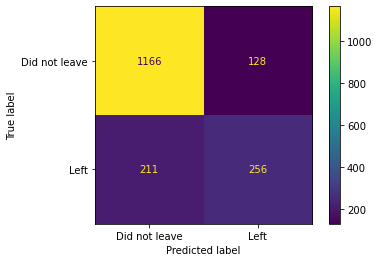

In [110]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not leave','Left'])

Out of 1294 , that did not leave , 1166 is correctly classified. But only 256 (54.81) is correctly classified out of 467. Problem is data imbalance. People leaving the company cost more, we will try to improve on the prediction on the people who are leaving the company.

XGB has a parameter, scale_pos_weight, that helps with imbalance data. We will try to improve prediction using **Cross validation** to optimize the parameter

By using scale pos weight , xgb increases the penalty for wrongly classifying the minority class.

# Optimize Parameters using Cross Validation and GridSearch()

XGBoost has a lot of hyperparameters, parameters that we have to manual 
configure and are not detemined by XGBoost itself, including max_depth, the 
maximum depth, learning_rate, the learning rate, or 'eta', gamma, the parameter
that encourages pruning, and reg_lambda, the regularization parameter lambda. 
So let's try to find the optimal values for these hyperparameters in hopes 
that we can improve the accuracy with the Testing Dataset.

In [116]:
## Note: When data are imbalanced, the XGBoost manaul says..
# If you care only about the overall performance metric (AUC) of your 
# Prediction
##  * Balance the positive and negative weights via scale_pos_weight
##  * Use AUC for evaluation
## Running sequentially on subsets of parameter options, rather than all at 
## in order to optimize parameters in a short period of time.

In [120]:
# Round 1 
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate': [0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}

In [121]:
opimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        seed = 42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5,
                                                        early_stopping_rounds=10,
                                                             eval_metric='auc'),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=1,
                            n_jobs=1,
                            cv=3)

In [ ]:
# Subsample = 0.9  90% of rows / data is used to build a tree
# Col sample 0.5, 50% of column is used to build a tree

In [122]:
opimal_params.fit(X_train,
                 y_train,
                
                 eval_set=[(X_test,y_test)])

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.78669
[1]	validation_0-auc:0.79715
[2]	validation_0-auc:0.80836
[3]	validation_0-auc:0.82287
[4]	validation_0-auc:0.82316
[5]	validation_0-auc:0.83071
[6]	validation_0-auc:0.83860
[7]	validation_0-auc:0.84352
[8]	validation_0-auc:0.84566
[9]	validation_0-auc:0.84776
[10]	validation_0-auc:0.84943
[11]	validation_0-auc:0.85108
[12]	validation_0-auc:0.85111
[13]	validation_0-auc:0.85095
[14]	validation_0-auc:0.85038
[15]	validation_0-auc:0.85166
[16]	validation_0-auc:0.85192
[17]	validation_0-auc:0.85161
[18]	validation_0-auc:0.85181
[19]	validation_0-auc:0.85173
[20]	validation_0-auc:0.85282
[21]	validation_0-auc:0.85224
[22]	validation_0-auc:0.85347
[23]	validation_0-auc:0.85374
[24]	validation_0-auc:0.85451
[25]	validation_0-auc:0.85423
[26]	validation_0-auc:0.85462
[27]	validation_0-auc:0.85444
[28]	validation_0-auc:0.85459
[29]	validation_0-auc:0.85463
[30]	validation_0-auc:0.85471
[31]	validation_0

[7]	validation_0-auc:0.84022
[8]	validation_0-auc:0.84181
[9]	validation_0-auc:0.84419
[10]	validation_0-auc:0.84561
[11]	validation_0-auc:0.84740
[12]	validation_0-auc:0.84807
[13]	validation_0-auc:0.84836
[14]	validation_0-auc:0.84866
[15]	validation_0-auc:0.84957
[16]	validation_0-auc:0.84945
[17]	validation_0-auc:0.84967
[18]	validation_0-auc:0.85036
[19]	validation_0-auc:0.85072
[20]	validation_0-auc:0.85038
[21]	validation_0-auc:0.85050
[22]	validation_0-auc:0.85141
[23]	validation_0-auc:0.85142
[24]	validation_0-auc:0.85194
[25]	validation_0-auc:0.85236
[26]	validation_0-auc:0.85297
[27]	validation_0-auc:0.85365
[28]	validation_0-auc:0.85372
[29]	validation_0-auc:0.85400
[30]	validation_0-auc:0.85421
[31]	validation_0-auc:0.85480
[32]	validation_0-auc:0.85517
[33]	validation_0-auc:0.85488
[34]	validation_0-auc:0.85451
[35]	validation_0-auc:0.85442
[36]	validation_0-auc:0.85428
[37]	validation_0-auc:0.85494
[38]	validation_0-auc:0.85496
[39]	validation_0-auc:0.85543
[40]	validati

[61]	validation_0-auc:0.85701
[62]	validation_0-auc:0.85694
[0]	validation_0-auc:0.79510
[1]	validation_0-auc:0.82947
[2]	validation_0-auc:0.83470
[3]	validation_0-auc:0.84326
[4]	validation_0-auc:0.84208
[5]	validation_0-auc:0.84425
[6]	validation_0-auc:0.84579
[7]	validation_0-auc:0.84519
[8]	validation_0-auc:0.84661
[9]	validation_0-auc:0.84795
[10]	validation_0-auc:0.84831
[11]	validation_0-auc:0.84883
[12]	validation_0-auc:0.84869
[13]	validation_0-auc:0.84985
[14]	validation_0-auc:0.84971
[15]	validation_0-auc:0.84967
[16]	validation_0-auc:0.84992
[17]	validation_0-auc:0.85037
[18]	validation_0-auc:0.85172
[19]	validation_0-auc:0.85105
[20]	validation_0-auc:0.85192
[21]	validation_0-auc:0.85230
[22]	validation_0-auc:0.85269
[23]	validation_0-auc:0.85268
[24]	validation_0-auc:0.85268
[25]	validation_0-auc:0.85323
[26]	validation_0-auc:0.85313
[27]	validation_0-auc:0.85386
[28]	validation_0-auc:0.85386
[29]	validation_0-auc:0.85468
[30]	validation_0-auc:0.85474
[31]	validation_0-au

[10]	validation_0-auc:0.84774
[11]	validation_0-auc:0.84906
[12]	validation_0-auc:0.84950
[13]	validation_0-auc:0.85067
[14]	validation_0-auc:0.85091
[15]	validation_0-auc:0.85151
[16]	validation_0-auc:0.85155
[17]	validation_0-auc:0.85127
[18]	validation_0-auc:0.85199
[19]	validation_0-auc:0.85213
[20]	validation_0-auc:0.85182
[21]	validation_0-auc:0.85163
[22]	validation_0-auc:0.85251
[23]	validation_0-auc:0.85240
[24]	validation_0-auc:0.85265
[25]	validation_0-auc:0.85295
[26]	validation_0-auc:0.85332
[27]	validation_0-auc:0.85351
[28]	validation_0-auc:0.85368
[29]	validation_0-auc:0.85385
[30]	validation_0-auc:0.85406
[31]	validation_0-auc:0.85426
[32]	validation_0-auc:0.85462
[33]	validation_0-auc:0.85473
[34]	validation_0-auc:0.85460
[35]	validation_0-auc:0.85470
[36]	validation_0-auc:0.85505
[37]	validation_0-auc:0.85566
[38]	validation_0-auc:0.85587
[39]	validation_0-auc:0.85642
[40]	validation_0-auc:0.85687
[41]	validation_0-auc:0.85698
[42]	validation_0-auc:0.85693
[43]	valid

[38]	validation_0-auc:0.85726
[39]	validation_0-auc:0.85726
[40]	validation_0-auc:0.85750
[41]	validation_0-auc:0.85752
[42]	validation_0-auc:0.85770
[43]	validation_0-auc:0.85771
[44]	validation_0-auc:0.85783
[45]	validation_0-auc:0.85790
[46]	validation_0-auc:0.85789
[47]	validation_0-auc:0.85742
[48]	validation_0-auc:0.85742
[49]	validation_0-auc:0.85745
[50]	validation_0-auc:0.85710
[51]	validation_0-auc:0.85698
[52]	validation_0-auc:0.85655
[53]	validation_0-auc:0.85650
[54]	validation_0-auc:0.85661
[55]	validation_0-auc:0.85658
[0]	validation_0-auc:0.82042
[1]	validation_0-auc:0.82593
[2]	validation_0-auc:0.84290
[3]	validation_0-auc:0.84870
[4]	validation_0-auc:0.84538
[5]	validation_0-auc:0.84896
[6]	validation_0-auc:0.84961
[7]	validation_0-auc:0.85113
[8]	validation_0-auc:0.85218
[9]	validation_0-auc:0.85246
[10]	validation_0-auc:0.85370
[11]	validation_0-auc:0.85528
[12]	validation_0-auc:0.85504
[13]	validation_0-auc:0.85519
[14]	validation_0-auc:0.85462
[15]	validation_0-au

[5]	validation_0-auc:0.84572
[6]	validation_0-auc:0.84757
[7]	validation_0-auc:0.84806
[8]	validation_0-auc:0.84978
[9]	validation_0-auc:0.84971
[10]	validation_0-auc:0.84931
[11]	validation_0-auc:0.85100
[12]	validation_0-auc:0.85160
[13]	validation_0-auc:0.85160
[14]	validation_0-auc:0.85133
[15]	validation_0-auc:0.85156
[16]	validation_0-auc:0.85180
[17]	validation_0-auc:0.85206
[18]	validation_0-auc:0.85215
[19]	validation_0-auc:0.85250
[20]	validation_0-auc:0.85216
[21]	validation_0-auc:0.85210
[22]	validation_0-auc:0.85287
[23]	validation_0-auc:0.85296
[24]	validation_0-auc:0.85366
[25]	validation_0-auc:0.85337
[26]	validation_0-auc:0.85339
[27]	validation_0-auc:0.85331
[28]	validation_0-auc:0.85329
[29]	validation_0-auc:0.85360
[30]	validation_0-auc:0.85364
[31]	validation_0-auc:0.85339
[32]	validation_0-auc:0.85394
[33]	validation_0-auc:0.85412
[34]	validation_0-auc:0.85368
[35]	validation_0-auc:0.85357
[36]	validation_0-auc:0.85409
[37]	validation_0-auc:0.85478
[38]	validation

[2]	validation_0-auc:0.81933
[3]	validation_0-auc:0.83355
[4]	validation_0-auc:0.83332
[5]	validation_0-auc:0.83724
[6]	validation_0-auc:0.83785
[7]	validation_0-auc:0.83979
[8]	validation_0-auc:0.84212
[9]	validation_0-auc:0.84406
[10]	validation_0-auc:0.84388
[11]	validation_0-auc:0.84626
[12]	validation_0-auc:0.84690
[13]	validation_0-auc:0.84596
[14]	validation_0-auc:0.84515
[15]	validation_0-auc:0.84644
[16]	validation_0-auc:0.84769
[17]	validation_0-auc:0.84830
[18]	validation_0-auc:0.85008
[19]	validation_0-auc:0.84924
[20]	validation_0-auc:0.85147
[21]	validation_0-auc:0.85262
[22]	validation_0-auc:0.85362
[23]	validation_0-auc:0.85446
[24]	validation_0-auc:0.85489
[25]	validation_0-auc:0.85489
[26]	validation_0-auc:0.85521
[27]	validation_0-auc:0.85567
[28]	validation_0-auc:0.85596
[29]	validation_0-auc:0.85651
[30]	validation_0-auc:0.85666
[31]	validation_0-auc:0.85684
[32]	validation_0-auc:0.85688
[33]	validation_0-auc:0.85714
[34]	validation_0-auc:0.85711
[35]	validation_0-

[17]	validation_0-auc:0.85407
[18]	validation_0-auc:0.85448
[19]	validation_0-auc:0.85457
[20]	validation_0-auc:0.85437
[21]	validation_0-auc:0.85399
[22]	validation_0-auc:0.85505
[0]	validation_0-auc:0.82048
[1]	validation_0-auc:0.82571
[2]	validation_0-auc:0.84660
[3]	validation_0-auc:0.84756
[4]	validation_0-auc:0.84434
[5]	validation_0-auc:0.84329
[6]	validation_0-auc:0.84326
[7]	validation_0-auc:0.84517
[8]	validation_0-auc:0.84752
[9]	validation_0-auc:0.84657
[10]	validation_0-auc:0.84745
[11]	validation_0-auc:0.84901
[12]	validation_0-auc:0.84906
[13]	validation_0-auc:0.84897
[14]	validation_0-auc:0.84828
[15]	validation_0-auc:0.84957
[16]	validation_0-auc:0.85001
[17]	validation_0-auc:0.84952
[18]	validation_0-auc:0.85030
[19]	validation_0-auc:0.85021
[20]	validation_0-auc:0.84917
[21]	validation_0-auc:0.84934
[22]	validation_0-auc:0.85052
[23]	validation_0-auc:0.85041
[24]	validation_0-auc:0.85035
[25]	validation_0-auc:0.85062
[26]	validation_0-auc:0.85069
[27]	validation_0-au

[15]	validation_0-auc:0.84660
[16]	validation_0-auc:0.84830
[17]	validation_0-auc:0.84922
[18]	validation_0-auc:0.85000
[19]	validation_0-auc:0.84888
[20]	validation_0-auc:0.85068
[21]	validation_0-auc:0.85183
[22]	validation_0-auc:0.85298
[23]	validation_0-auc:0.85379
[24]	validation_0-auc:0.85419
[25]	validation_0-auc:0.85458
[26]	validation_0-auc:0.85460
[27]	validation_0-auc:0.85491
[28]	validation_0-auc:0.85542
[29]	validation_0-auc:0.85585
[30]	validation_0-auc:0.85594
[31]	validation_0-auc:0.85659
[32]	validation_0-auc:0.85654
[33]	validation_0-auc:0.85698
[34]	validation_0-auc:0.85696
[35]	validation_0-auc:0.85725
[36]	validation_0-auc:0.85716
[37]	validation_0-auc:0.85741
[38]	validation_0-auc:0.85796
[39]	validation_0-auc:0.85817
[40]	validation_0-auc:0.85854
[41]	validation_0-auc:0.85897
[42]	validation_0-auc:0.85899
[43]	validation_0-auc:0.85914
[44]	validation_0-auc:0.85899
[45]	validation_0-auc:0.85904
[46]	validation_0-auc:0.85932
[47]	validation_0-auc:0.85924
[48]	valid

[58]	validation_0-auc:0.85645
[59]	validation_0-auc:0.85650
[60]	validation_0-auc:0.85661
[61]	validation_0-auc:0.85656
[62]	validation_0-auc:0.85639
[63]	validation_0-auc:0.85607
[64]	validation_0-auc:0.85609
[0]	validation_0-auc:0.81479
[1]	validation_0-auc:0.84227
[2]	validation_0-auc:0.84301
[3]	validation_0-auc:0.84514
[4]	validation_0-auc:0.84719
[5]	validation_0-auc:0.84829
[6]	validation_0-auc:0.84926
[7]	validation_0-auc:0.85055
[8]	validation_0-auc:0.85176
[9]	validation_0-auc:0.85334
[10]	validation_0-auc:0.85347
[11]	validation_0-auc:0.85414
[12]	validation_0-auc:0.85318
[13]	validation_0-auc:0.85388
[14]	validation_0-auc:0.85437
[15]	validation_0-auc:0.85481
[16]	validation_0-auc:0.85554
[17]	validation_0-auc:0.85452
[18]	validation_0-auc:0.85486
[19]	validation_0-auc:0.85419
[20]	validation_0-auc:0.85384
[21]	validation_0-auc:0.85384
[22]	validation_0-auc:0.85376
[23]	validation_0-auc:0.85415
[24]	validation_0-auc:0.85393
[25]	validation_0-auc:0.85380
[26]	validation_0-au

[30]	validation_0-auc:0.84756
[31]	validation_0-auc:0.84751
[32]	validation_0-auc:0.84767
[33]	validation_0-auc:0.84760
[34]	validation_0-auc:0.84766
[35]	validation_0-auc:0.84840
[36]	validation_0-auc:0.84833
[37]	validation_0-auc:0.84826
[38]	validation_0-auc:0.84787
[39]	validation_0-auc:0.84843
[40]	validation_0-auc:0.84864
[41]	validation_0-auc:0.84870
[42]	validation_0-auc:0.84903
[43]	validation_0-auc:0.84906
[44]	validation_0-auc:0.84901
[45]	validation_0-auc:0.84896
[46]	validation_0-auc:0.84872
[47]	validation_0-auc:0.84882
[48]	validation_0-auc:0.84890
[49]	validation_0-auc:0.84902
[50]	validation_0-auc:0.84908
[51]	validation_0-auc:0.84932
[52]	validation_0-auc:0.84948
[53]	validation_0-auc:0.84957
[54]	validation_0-auc:0.84978
[55]	validation_0-auc:0.84984
[56]	validation_0-auc:0.85022
[57]	validation_0-auc:0.85013
[58]	validation_0-auc:0.85010
[59]	validation_0-auc:0.85025
[60]	validation_0-auc:0.85006
[61]	validation_0-auc:0.85009
[62]	validation_0-auc:0.85015
[63]	valid

[34]	validation_0-auc:0.84291
[35]	validation_0-auc:0.84279
[36]	validation_0-auc:0.84277
[37]	validation_0-auc:0.84271
[38]	validation_0-auc:0.84217
[39]	validation_0-auc:0.84191
[40]	validation_0-auc:0.84196
[41]	validation_0-auc:0.84195
[0]	validation_0-auc:0.77956
[1]	validation_0-auc:0.80429
[2]	validation_0-auc:0.80993
[3]	validation_0-auc:0.82597
[4]	validation_0-auc:0.82668
[5]	validation_0-auc:0.82695
[6]	validation_0-auc:0.82614
[7]	validation_0-auc:0.82332
[8]	validation_0-auc:0.82780
[9]	validation_0-auc:0.83114
[10]	validation_0-auc:0.83376
[11]	validation_0-auc:0.83437
[12]	validation_0-auc:0.83551
[13]	validation_0-auc:0.83487
[14]	validation_0-auc:0.83404
[15]	validation_0-auc:0.83583
[16]	validation_0-auc:0.83687
[17]	validation_0-auc:0.83722
[18]	validation_0-auc:0.83742
[19]	validation_0-auc:0.83646
[20]	validation_0-auc:0.83709
[21]	validation_0-auc:0.83856
[22]	validation_0-auc:0.83856
[23]	validation_0-auc:0.83880
[24]	validation_0-auc:0.83820
[25]	validation_0-au

[23]	validation_0-auc:0.85148
[24]	validation_0-auc:0.85152
[25]	validation_0-auc:0.85175
[26]	validation_0-auc:0.85199
[27]	validation_0-auc:0.85182
[28]	validation_0-auc:0.85170
[0]	validation_0-auc:0.81597
[1]	validation_0-auc:0.81694
[2]	validation_0-auc:0.82741
[3]	validation_0-auc:0.83382
[4]	validation_0-auc:0.83213
[5]	validation_0-auc:0.83656
[6]	validation_0-auc:0.84200
[7]	validation_0-auc:0.84437
[8]	validation_0-auc:0.84565
[9]	validation_0-auc:0.84770
[10]	validation_0-auc:0.84840
[11]	validation_0-auc:0.84905
[12]	validation_0-auc:0.84902
[13]	validation_0-auc:0.85021
[14]	validation_0-auc:0.84994
[15]	validation_0-auc:0.85034
[16]	validation_0-auc:0.85016
[17]	validation_0-auc:0.84997
[18]	validation_0-auc:0.85032
[19]	validation_0-auc:0.84990
[20]	validation_0-auc:0.84907
[21]	validation_0-auc:0.84855
[22]	validation_0-auc:0.84899
[23]	validation_0-auc:0.84958
[24]	validation_0-auc:0.84980
[25]	validation_0-auc:0.85060
[26]	validation_0-auc:0.85113
[27]	validation_0-au

[26]	validation_0-auc:0.85309
[27]	validation_0-auc:0.85363
[28]	validation_0-auc:0.85397
[29]	validation_0-auc:0.85419
[30]	validation_0-auc:0.85441
[31]	validation_0-auc:0.85433
[32]	validation_0-auc:0.85422
[33]	validation_0-auc:0.85438
[34]	validation_0-auc:0.85425
[35]	validation_0-auc:0.85433
[36]	validation_0-auc:0.85458
[37]	validation_0-auc:0.85463
[38]	validation_0-auc:0.85462
[39]	validation_0-auc:0.85471
[40]	validation_0-auc:0.85508
[41]	validation_0-auc:0.85530
[42]	validation_0-auc:0.85518
[43]	validation_0-auc:0.85538
[44]	validation_0-auc:0.85541
[45]	validation_0-auc:0.85521
[46]	validation_0-auc:0.85496
[47]	validation_0-auc:0.85512
[48]	validation_0-auc:0.85542
[49]	validation_0-auc:0.85554
[50]	validation_0-auc:0.85548
[51]	validation_0-auc:0.85542
[52]	validation_0-auc:0.85560
[53]	validation_0-auc:0.85585
[54]	validation_0-auc:0.85604
[55]	validation_0-auc:0.85599
[56]	validation_0-auc:0.85596
[57]	validation_0-auc:0.85595
[58]	validation_0-auc:0.85573
[59]	valid

[19]	validation_0-auc:0.85230
[20]	validation_0-auc:0.85203
[21]	validation_0-auc:0.85155
[0]	validation_0-auc:0.81666
[1]	validation_0-auc:0.82251
[2]	validation_0-auc:0.83984
[3]	validation_0-auc:0.84435
[4]	validation_0-auc:0.84237
[5]	validation_0-auc:0.84575
[6]	validation_0-auc:0.84730
[7]	validation_0-auc:0.84761
[8]	validation_0-auc:0.84781
[9]	validation_0-auc:0.84923
[10]	validation_0-auc:0.84963
[11]	validation_0-auc:0.85179
[12]	validation_0-auc:0.85147
[13]	validation_0-auc:0.85097
[14]	validation_0-auc:0.85118
[15]	validation_0-auc:0.85204
[16]	validation_0-auc:0.85196
[17]	validation_0-auc:0.85128
[18]	validation_0-auc:0.85120
[19]	validation_0-auc:0.85090
[20]	validation_0-auc:0.85045
[21]	validation_0-auc:0.84986
[22]	validation_0-auc:0.85042
[23]	validation_0-auc:0.85086
[24]	validation_0-auc:0.85160
[25]	validation_0-auc:0.85197
[0]	validation_0-auc:0.81608
[1]	validation_0-auc:0.84491
[2]	validation_0-auc:0.84467
[3]	validation_0-auc:0.84545
[4]	validation_0-auc:0.8

[1]	validation_0-auc:0.82111
[2]	validation_0-auc:0.83742
[3]	validation_0-auc:0.84609
[4]	validation_0-auc:0.84090
[5]	validation_0-auc:0.84524
[6]	validation_0-auc:0.84680
[7]	validation_0-auc:0.84891
[8]	validation_0-auc:0.84999
[9]	validation_0-auc:0.85033
[10]	validation_0-auc:0.85125
[11]	validation_0-auc:0.85163
[12]	validation_0-auc:0.85142
[13]	validation_0-auc:0.85134
[14]	validation_0-auc:0.85084
[15]	validation_0-auc:0.85060
[16]	validation_0-auc:0.85082
[17]	validation_0-auc:0.85061
[18]	validation_0-auc:0.85062
[19]	validation_0-auc:0.85046
[20]	validation_0-auc:0.85023
[0]	validation_0-auc:0.81724
[1]	validation_0-auc:0.82379
[2]	validation_0-auc:0.83952
[3]	validation_0-auc:0.84478
[4]	validation_0-auc:0.84205
[5]	validation_0-auc:0.84542
[6]	validation_0-auc:0.84701
[7]	validation_0-auc:0.84770
[8]	validation_0-auc:0.84796
[9]	validation_0-auc:0.84923
[10]	validation_0-auc:0.84911
[11]	validation_0-auc:0.85027
[12]	validation_0-auc:0.85039
[13]	validation_0-auc:0.85020

[3]	validation_0-auc:0.84601
[4]	validation_0-auc:0.84741
[5]	validation_0-auc:0.84715
[6]	validation_0-auc:0.84712
[7]	validation_0-auc:0.84778
[8]	validation_0-auc:0.84923
[9]	validation_0-auc:0.85019
[10]	validation_0-auc:0.85169
[11]	validation_0-auc:0.85223
[12]	validation_0-auc:0.85233
[13]	validation_0-auc:0.85224
[14]	validation_0-auc:0.85170
[15]	validation_0-auc:0.85311
[16]	validation_0-auc:0.85344
[17]	validation_0-auc:0.85316
[18]	validation_0-auc:0.85364
[19]	validation_0-auc:0.85271
[20]	validation_0-auc:0.85283
[21]	validation_0-auc:0.85323
[22]	validation_0-auc:0.85366
[23]	validation_0-auc:0.85379
[24]	validation_0-auc:0.85403
[25]	validation_0-auc:0.85401
[26]	validation_0-auc:0.85406
[27]	validation_0-auc:0.85441
[28]	validation_0-auc:0.85466
[29]	validation_0-auc:0.85472
[30]	validation_0-auc:0.85504
[31]	validation_0-auc:0.85529
[32]	validation_0-auc:0.85544
[33]	validation_0-auc:0.85553
[34]	validation_0-auc:0.85555
[35]	validation_0-auc:0.85527
[36]	validation_0

[23]	validation_0-auc:0.85054
[24]	validation_0-auc:0.85068
[25]	validation_0-auc:0.85137
[0]	validation_0-auc:0.81744
[1]	validation_0-auc:0.83434
[2]	validation_0-auc:0.83973
[3]	validation_0-auc:0.84763
[4]	validation_0-auc:0.85016
[5]	validation_0-auc:0.85140
[6]	validation_0-auc:0.85104
[7]	validation_0-auc:0.85050
[8]	validation_0-auc:0.85224
[9]	validation_0-auc:0.85448
[10]	validation_0-auc:0.85441
[11]	validation_0-auc:0.85438
[12]	validation_0-auc:0.85404
[13]	validation_0-auc:0.85248
[14]	validation_0-auc:0.85144
[15]	validation_0-auc:0.85201
[16]	validation_0-auc:0.85228
[17]	validation_0-auc:0.85179
[18]	validation_0-auc:0.85222
[19]	validation_0-auc:0.85132
[0]	validation_0-auc:0.80757
[1]	validation_0-auc:0.81447
[2]	validation_0-auc:0.83493
[3]	validation_0-auc:0.84386
[4]	validation_0-auc:0.83903
[5]	validation_0-auc:0.84231
[6]	validation_0-auc:0.84632
[7]	validation_0-auc:0.84927
[8]	validation_0-auc:0.85119
[9]	validation_0-auc:0.85206
[10]	validation_0-auc:0.85300


[75]	validation_0-auc:0.85424
[76]	validation_0-auc:0.85429
[0]	validation_0-auc:0.82196
[1]	validation_0-auc:0.82328
[2]	validation_0-auc:0.83908
[3]	validation_0-auc:0.84576
[4]	validation_0-auc:0.84334
[5]	validation_0-auc:0.84537
[6]	validation_0-auc:0.84631
[7]	validation_0-auc:0.84710
[8]	validation_0-auc:0.84832
[9]	validation_0-auc:0.84932
[10]	validation_0-auc:0.85046
[11]	validation_0-auc:0.85143
[12]	validation_0-auc:0.85166
[13]	validation_0-auc:0.85147
[14]	validation_0-auc:0.85172
[15]	validation_0-auc:0.85188
[16]	validation_0-auc:0.85187
[17]	validation_0-auc:0.85090
[18]	validation_0-auc:0.85109
[19]	validation_0-auc:0.85106
[20]	validation_0-auc:0.85055
[21]	validation_0-auc:0.84988
[22]	validation_0-auc:0.85052
[23]	validation_0-auc:0.85079
[24]	validation_0-auc:0.85070
[25]	validation_0-auc:0.85114
[0]	validation_0-auc:0.81479
[1]	validation_0-auc:0.84234
[2]	validation_0-auc:0.84277
[3]	validation_0-auc:0.84365
[4]	validation_0-auc:0.84604
[5]	validation_0-auc:0.84

[56]	validation_0-auc:0.85582
[57]	validation_0-auc:0.85555
[58]	validation_0-auc:0.85570
[59]	validation_0-auc:0.85568
[60]	validation_0-auc:0.85563
[61]	validation_0-auc:0.85561
[62]	validation_0-auc:0.85554
[63]	validation_0-auc:0.85579
[0]	validation_0-auc:0.79274
[1]	validation_0-auc:0.81241
[2]	validation_0-auc:0.83226
[3]	validation_0-auc:0.84344
[4]	validation_0-auc:0.83864
[5]	validation_0-auc:0.84486
[6]	validation_0-auc:0.84630
[7]	validation_0-auc:0.84840
[8]	validation_0-auc:0.84818
[9]	validation_0-auc:0.84867
[10]	validation_0-auc:0.84822
[11]	validation_0-auc:0.84980
[12]	validation_0-auc:0.84933
[13]	validation_0-auc:0.84885
[14]	validation_0-auc:0.84872
[15]	validation_0-auc:0.84954
[16]	validation_0-auc:0.84921
[17]	validation_0-auc:0.84877
[18]	validation_0-auc:0.84871
[19]	validation_0-auc:0.84894
[20]	validation_0-auc:0.84951
[21]	validation_0-auc:0.84958
[0]	validation_0-auc:0.79015
[1]	validation_0-auc:0.80440
[2]	validation_0-auc:0.82896
[3]	validation_0-auc:0.

[13]	validation_0-auc:0.84664
[14]	validation_0-auc:0.84737
[15]	validation_0-auc:0.84790
[16]	validation_0-auc:0.84814
[17]	validation_0-auc:0.84772
[18]	validation_0-auc:0.84748
[19]	validation_0-auc:0.84787
[20]	validation_0-auc:0.84756
[21]	validation_0-auc:0.84781
[22]	validation_0-auc:0.84822
[23]	validation_0-auc:0.84837
[24]	validation_0-auc:0.84879
[25]	validation_0-auc:0.84902
[26]	validation_0-auc:0.84994
[27]	validation_0-auc:0.85051
[28]	validation_0-auc:0.85030
[29]	validation_0-auc:0.85098
[30]	validation_0-auc:0.85143
[31]	validation_0-auc:0.85218
[32]	validation_0-auc:0.85277
[33]	validation_0-auc:0.85316
[34]	validation_0-auc:0.85328
[35]	validation_0-auc:0.85354
[36]	validation_0-auc:0.85391
[37]	validation_0-auc:0.85408
[38]	validation_0-auc:0.85401
[39]	validation_0-auc:0.85425
[40]	validation_0-auc:0.85448
[41]	validation_0-auc:0.85454
[42]	validation_0-auc:0.85424
[43]	validation_0-auc:0.85425
[44]	validation_0-auc:0.85455
[45]	validation_0-auc:0.85448
[46]	valid

[7]	validation_0-auc:0.84135
[8]	validation_0-auc:0.84236
[9]	validation_0-auc:0.84392
[10]	validation_0-auc:0.84546
[11]	validation_0-auc:0.84691
[12]	validation_0-auc:0.84806
[13]	validation_0-auc:0.84733
[14]	validation_0-auc:0.84785
[15]	validation_0-auc:0.84864
[16]	validation_0-auc:0.84861
[17]	validation_0-auc:0.84825
[18]	validation_0-auc:0.84804
[19]	validation_0-auc:0.84819
[20]	validation_0-auc:0.84780
[21]	validation_0-auc:0.84798
[22]	validation_0-auc:0.84825
[23]	validation_0-auc:0.84843
[24]	validation_0-auc:0.84917
[25]	validation_0-auc:0.84989
[26]	validation_0-auc:0.85040
[27]	validation_0-auc:0.85100
[28]	validation_0-auc:0.85096
[29]	validation_0-auc:0.85145
[30]	validation_0-auc:0.85183
[31]	validation_0-auc:0.85176
[32]	validation_0-auc:0.85213
[33]	validation_0-auc:0.85230
[34]	validation_0-auc:0.85250
[35]	validation_0-auc:0.85267
[36]	validation_0-auc:0.85275
[37]	validation_0-auc:0.85290
[38]	validation_0-auc:0.85287
[39]	validation_0-auc:0.85330
[40]	validati

[56]	validation_0-auc:0.85410
[57]	validation_0-auc:0.85429
[58]	validation_0-auc:0.85459
[59]	validation_0-auc:0.85446
[60]	validation_0-auc:0.85472
[61]	validation_0-auc:0.85499
[62]	validation_0-auc:0.85519
[63]	validation_0-auc:0.85519
[64]	validation_0-auc:0.85516
[65]	validation_0-auc:0.85532
[66]	validation_0-auc:0.85546
[67]	validation_0-auc:0.85569
[68]	validation_0-auc:0.85552
[69]	validation_0-auc:0.85583
[70]	validation_0-auc:0.85596
[71]	validation_0-auc:0.85623
[72]	validation_0-auc:0.85612
[73]	validation_0-auc:0.85624
[74]	validation_0-auc:0.85621
[75]	validation_0-auc:0.85627
[76]	validation_0-auc:0.85631
[77]	validation_0-auc:0.85624
[78]	validation_0-auc:0.85633
[79]	validation_0-auc:0.85656
[80]	validation_0-auc:0.85660
[81]	validation_0-auc:0.85672
[82]	validation_0-auc:0.85678
[83]	validation_0-auc:0.85666
[84]	validation_0-auc:0.85675
[85]	validation_0-auc:0.85698
[86]	validation_0-auc:0.85717
[87]	validation_0-auc:0.85722
[88]	validation_0-auc:0.85745
[89]	valid

[31]	validation_0-auc:0.85224
[32]	validation_0-auc:0.85311
[33]	validation_0-auc:0.85307
[34]	validation_0-auc:0.85326
[35]	validation_0-auc:0.85326
[36]	validation_0-auc:0.85313
[37]	validation_0-auc:0.85350
[38]	validation_0-auc:0.85345
[39]	validation_0-auc:0.85397
[40]	validation_0-auc:0.85428
[41]	validation_0-auc:0.85444
[42]	validation_0-auc:0.85479
[43]	validation_0-auc:0.85464
[44]	validation_0-auc:0.85471
[45]	validation_0-auc:0.85465
[46]	validation_0-auc:0.85486
[47]	validation_0-auc:0.85494
[48]	validation_0-auc:0.85495
[49]	validation_0-auc:0.85494
[50]	validation_0-auc:0.85489
[51]	validation_0-auc:0.85521
[52]	validation_0-auc:0.85503
[53]	validation_0-auc:0.85551
[54]	validation_0-auc:0.85551
[55]	validation_0-auc:0.85550
[56]	validation_0-auc:0.85539
[57]	validation_0-auc:0.85556
[58]	validation_0-auc:0.85588
[59]	validation_0-auc:0.85585
[60]	validation_0-auc:0.85607
[61]	validation_0-auc:0.85637
[62]	validation_0-auc:0.85654
[63]	validation_0-auc:0.85659
[64]	valid

[39]	validation_0-auc:0.85579
[40]	validation_0-auc:0.85618
[41]	validation_0-auc:0.85662
[42]	validation_0-auc:0.85649
[43]	validation_0-auc:0.85638
[44]	validation_0-auc:0.85639
[45]	validation_0-auc:0.85659
[46]	validation_0-auc:0.85673
[47]	validation_0-auc:0.85697
[48]	validation_0-auc:0.85694
[49]	validation_0-auc:0.85685
[50]	validation_0-auc:0.85660
[51]	validation_0-auc:0.85685
[52]	validation_0-auc:0.85700
[53]	validation_0-auc:0.85711
[54]	validation_0-auc:0.85700
[55]	validation_0-auc:0.85696
[56]	validation_0-auc:0.85677
[57]	validation_0-auc:0.85680
[58]	validation_0-auc:0.85706
[59]	validation_0-auc:0.85696
[60]	validation_0-auc:0.85714
[61]	validation_0-auc:0.85736
[62]	validation_0-auc:0.85739
[63]	validation_0-auc:0.85752
[64]	validation_0-auc:0.85734
[65]	validation_0-auc:0.85742
[66]	validation_0-auc:0.85743
[67]	validation_0-auc:0.85744
[68]	validation_0-auc:0.85720
[69]	validation_0-auc:0.85746
[70]	validation_0-auc:0.85742
[71]	validation_0-auc:0.85786
[72]	valid

[77]	validation_0-auc:0.86303
[78]	validation_0-auc:0.86311
[79]	validation_0-auc:0.86310
[80]	validation_0-auc:0.86291
[81]	validation_0-auc:0.86292
[82]	validation_0-auc:0.86305
[83]	validation_0-auc:0.86323
[84]	validation_0-auc:0.86316
[85]	validation_0-auc:0.86329
[86]	validation_0-auc:0.86318
[87]	validation_0-auc:0.86320
[88]	validation_0-auc:0.86311
[89]	validation_0-auc:0.86325
[90]	validation_0-auc:0.86318
[91]	validation_0-auc:0.86314
[92]	validation_0-auc:0.86327
[93]	validation_0-auc:0.86295
[94]	validation_0-auc:0.86304
[0]	validation_0-auc:0.81383
[1]	validation_0-auc:0.81287
[2]	validation_0-auc:0.82511
[3]	validation_0-auc:0.83189
[4]	validation_0-auc:0.82948
[5]	validation_0-auc:0.83466
[6]	validation_0-auc:0.84188
[7]	validation_0-auc:0.84473
[8]	validation_0-auc:0.84630
[9]	validation_0-auc:0.84685
[10]	validation_0-auc:0.84732
[11]	validation_0-auc:0.84812
[12]	validation_0-auc:0.84906
[13]	validation_0-auc:0.84927
[14]	validation_0-auc:0.85007
[15]	validation_0-au

[55]	validation_0-auc:0.85782
[56]	validation_0-auc:0.85767
[57]	validation_0-auc:0.85773
[58]	validation_0-auc:0.85815
[59]	validation_0-auc:0.85817
[60]	validation_0-auc:0.85849
[61]	validation_0-auc:0.85875
[62]	validation_0-auc:0.85888
[63]	validation_0-auc:0.85898
[64]	validation_0-auc:0.85875
[65]	validation_0-auc:0.85877
[66]	validation_0-auc:0.85886
[67]	validation_0-auc:0.85887
[68]	validation_0-auc:0.85862
[69]	validation_0-auc:0.85899
[70]	validation_0-auc:0.85891
[71]	validation_0-auc:0.85915
[72]	validation_0-auc:0.85906
[73]	validation_0-auc:0.85880
[74]	validation_0-auc:0.85865
[75]	validation_0-auc:0.85873
[76]	validation_0-auc:0.85856
[77]	validation_0-auc:0.85843
[78]	validation_0-auc:0.85834
[79]	validation_0-auc:0.85853
[80]	validation_0-auc:0.85856
[81]	validation_0-auc:0.85862
[0]	validation_0-auc:0.81974
[1]	validation_0-auc:0.83458
[2]	validation_0-auc:0.84117
[3]	validation_0-auc:0.84817
[4]	validation_0-auc:0.84878
[5]	validation_0-auc:0.84903
[6]	validation_0

[92]	validation_0-auc:0.86127
[93]	validation_0-auc:0.86112
[94]	validation_0-auc:0.86118
[95]	validation_0-auc:0.86128
[96]	validation_0-auc:0.86133
[97]	validation_0-auc:0.86101
[98]	validation_0-auc:0.86100
[99]	validation_0-auc:0.86101
[0]	validation_0-auc:0.82060
[1]	validation_0-auc:0.82064
[2]	validation_0-auc:0.82824
[3]	validation_0-auc:0.83569
[4]	validation_0-auc:0.83466
[5]	validation_0-auc:0.83816
[6]	validation_0-auc:0.84446
[7]	validation_0-auc:0.84600
[8]	validation_0-auc:0.84677
[9]	validation_0-auc:0.84768
[10]	validation_0-auc:0.84826
[11]	validation_0-auc:0.84879
[12]	validation_0-auc:0.84889
[13]	validation_0-auc:0.84953
[14]	validation_0-auc:0.84982
[15]	validation_0-auc:0.85039
[16]	validation_0-auc:0.85054
[17]	validation_0-auc:0.85030
[18]	validation_0-auc:0.85035
[19]	validation_0-auc:0.85066
[20]	validation_0-auc:0.85064
[21]	validation_0-auc:0.85013
[22]	validation_0-auc:0.85057
[23]	validation_0-auc:0.85058
[24]	validation_0-auc:0.85126
[25]	validation_0-au

[25]	validation_0-auc:0.85503
[26]	validation_0-auc:0.85527
[27]	validation_0-auc:0.85517
[28]	validation_0-auc:0.85524
[29]	validation_0-auc:0.85548
[30]	validation_0-auc:0.85526
[31]	validation_0-auc:0.85554
[32]	validation_0-auc:0.85629
[33]	validation_0-auc:0.85685
[34]	validation_0-auc:0.85631
[35]	validation_0-auc:0.85667
[36]	validation_0-auc:0.85717
[37]	validation_0-auc:0.85774
[38]	validation_0-auc:0.85800
[39]	validation_0-auc:0.85798
[40]	validation_0-auc:0.85834
[41]	validation_0-auc:0.85818
[42]	validation_0-auc:0.85799
[43]	validation_0-auc:0.85735
[44]	validation_0-auc:0.85716
[45]	validation_0-auc:0.85731
[46]	validation_0-auc:0.85703
[47]	validation_0-auc:0.85725
[48]	validation_0-auc:0.85750
[49]	validation_0-auc:0.85734
[0]	validation_0-auc:0.82629
[1]	validation_0-auc:0.82347
[2]	validation_0-auc:0.83962
[3]	validation_0-auc:0.84395
[4]	validation_0-auc:0.84244
[5]	validation_0-auc:0.84308
[6]	validation_0-auc:0.84633
[7]	validation_0-auc:0.84894
[8]	validation_0-a

[31]	validation_0-auc:0.85561
[32]	validation_0-auc:0.85622
[33]	validation_0-auc:0.85686
[34]	validation_0-auc:0.85722
[35]	validation_0-auc:0.85761
[36]	validation_0-auc:0.85779
[37]	validation_0-auc:0.85829
[38]	validation_0-auc:0.85833
[39]	validation_0-auc:0.85847
[40]	validation_0-auc:0.85862
[41]	validation_0-auc:0.85865
[42]	validation_0-auc:0.85886
[43]	validation_0-auc:0.85898
[44]	validation_0-auc:0.85876
[45]	validation_0-auc:0.85877
[46]	validation_0-auc:0.85891
[47]	validation_0-auc:0.85896
[48]	validation_0-auc:0.85892
[49]	validation_0-auc:0.85877
[50]	validation_0-auc:0.85859
[51]	validation_0-auc:0.85832
[52]	validation_0-auc:0.85831
[53]	validation_0-auc:0.85841
[0]	validation_0-auc:0.82193
[1]	validation_0-auc:0.82511
[2]	validation_0-auc:0.84124
[3]	validation_0-auc:0.84499
[4]	validation_0-auc:0.84092
[5]	validation_0-auc:0.84327
[6]	validation_0-auc:0.84400
[7]	validation_0-auc:0.84571
[8]	validation_0-auc:0.84798
[9]	validation_0-auc:0.84965
[10]	validation_0-au

[41]	validation_0-auc:0.85503
[42]	validation_0-auc:0.85502
[43]	validation_0-auc:0.85523
[44]	validation_0-auc:0.85512
[45]	validation_0-auc:0.85553
[46]	validation_0-auc:0.85591
[47]	validation_0-auc:0.85617
[48]	validation_0-auc:0.85623
[49]	validation_0-auc:0.85618
[50]	validation_0-auc:0.85616
[51]	validation_0-auc:0.85646
[52]	validation_0-auc:0.85670
[53]	validation_0-auc:0.85701
[54]	validation_0-auc:0.85715
[55]	validation_0-auc:0.85691
[56]	validation_0-auc:0.85688
[57]	validation_0-auc:0.85697
[58]	validation_0-auc:0.85742
[59]	validation_0-auc:0.85743
[60]	validation_0-auc:0.85789
[61]	validation_0-auc:0.85807
[62]	validation_0-auc:0.85830
[63]	validation_0-auc:0.85830
[64]	validation_0-auc:0.85843
[65]	validation_0-auc:0.85867
[66]	validation_0-auc:0.85880
[67]	validation_0-auc:0.85893
[68]	validation_0-auc:0.85869
[69]	validation_0-auc:0.85874
[70]	validation_0-auc:0.85877
[71]	validation_0-auc:0.85907
[72]	validation_0-auc:0.85918
[73]	validation_0-auc:0.85903
[74]	valid

[38]	validation_0-auc:0.85776
[39]	validation_0-auc:0.85800
[40]	validation_0-auc:0.85846
[41]	validation_0-auc:0.85849
[42]	validation_0-auc:0.85859
[43]	validation_0-auc:0.85875
[44]	validation_0-auc:0.85876
[45]	validation_0-auc:0.85890
[46]	validation_0-auc:0.85905
[47]	validation_0-auc:0.85941
[48]	validation_0-auc:0.85937
[49]	validation_0-auc:0.85916
[50]	validation_0-auc:0.85921
[51]	validation_0-auc:0.85935
[52]	validation_0-auc:0.85949
[53]	validation_0-auc:0.85967
[54]	validation_0-auc:0.85984
[55]	validation_0-auc:0.85967
[56]	validation_0-auc:0.85957
[57]	validation_0-auc:0.85965
[58]	validation_0-auc:0.85985
[59]	validation_0-auc:0.85993
[60]	validation_0-auc:0.86031
[61]	validation_0-auc:0.86034
[62]	validation_0-auc:0.86034
[63]	validation_0-auc:0.86031
[64]	validation_0-auc:0.86027
[65]	validation_0-auc:0.86042
[66]	validation_0-auc:0.86045
[67]	validation_0-auc:0.86060
[68]	validation_0-auc:0.86056
[69]	validation_0-auc:0.86084
[70]	validation_0-auc:0.86099
[71]	valid

[36]	validation_0-auc:0.85640
[37]	validation_0-auc:0.85680
[38]	validation_0-auc:0.85687
[39]	validation_0-auc:0.85711
[40]	validation_0-auc:0.85746
[41]	validation_0-auc:0.85713
[42]	validation_0-auc:0.85693
[43]	validation_0-auc:0.85681
[44]	validation_0-auc:0.85686
[45]	validation_0-auc:0.85686
[46]	validation_0-auc:0.85670
[47]	validation_0-auc:0.85684
[48]	validation_0-auc:0.85682
[49]	validation_0-auc:0.85672
[50]	validation_0-auc:0.85669
[0]	validation_0-auc:0.79636
[1]	validation_0-auc:0.80542
[2]	validation_0-auc:0.81933
[3]	validation_0-auc:0.82987
[4]	validation_0-auc:0.82687
[5]	validation_0-auc:0.83231
[6]	validation_0-auc:0.83844
[7]	validation_0-auc:0.84018
[8]	validation_0-auc:0.84178
[9]	validation_0-auc:0.84419
[10]	validation_0-auc:0.84558
[11]	validation_0-auc:0.84738
[12]	validation_0-auc:0.84807
[13]	validation_0-auc:0.84834
[14]	validation_0-auc:0.84866
[15]	validation_0-auc:0.84957
[16]	validation_0-auc:0.84945
[17]	validation_0-auc:0.84966
[18]	validation_0-au

[28]	validation_0-auc:0.85382
[29]	validation_0-auc:0.85420
[30]	validation_0-auc:0.85452
[31]	validation_0-auc:0.85502
[32]	validation_0-auc:0.85555
[33]	validation_0-auc:0.85555
[34]	validation_0-auc:0.85507
[35]	validation_0-auc:0.85507
[36]	validation_0-auc:0.85499
[37]	validation_0-auc:0.85574
[38]	validation_0-auc:0.85584
[39]	validation_0-auc:0.85647
[40]	validation_0-auc:0.85687
[41]	validation_0-auc:0.85715
[42]	validation_0-auc:0.85722
[43]	validation_0-auc:0.85709
[44]	validation_0-auc:0.85696
[45]	validation_0-auc:0.85735
[46]	validation_0-auc:0.85736
[47]	validation_0-auc:0.85748
[48]	validation_0-auc:0.85761
[49]	validation_0-auc:0.85749
[50]	validation_0-auc:0.85788
[51]	validation_0-auc:0.85793
[52]	validation_0-auc:0.85823
[53]	validation_0-auc:0.85833
[54]	validation_0-auc:0.85824
[55]	validation_0-auc:0.85786
[56]	validation_0-auc:0.85751
[57]	validation_0-auc:0.85731
[58]	validation_0-auc:0.85733
[59]	validation_0-auc:0.85711
[60]	validation_0-auc:0.85741
[61]	valid

[8]	validation_0-auc:0.83993
[9]	validation_0-auc:0.84298
[10]	validation_0-auc:0.84428
[11]	validation_0-auc:0.84512
[12]	validation_0-auc:0.84677
[13]	validation_0-auc:0.84664
[14]	validation_0-auc:0.84617
[15]	validation_0-auc:0.84735
[16]	validation_0-auc:0.84818
[17]	validation_0-auc:0.84783
[18]	validation_0-auc:0.84833
[19]	validation_0-auc:0.84854
[20]	validation_0-auc:0.84948
[21]	validation_0-auc:0.84945
[22]	validation_0-auc:0.85035
[23]	validation_0-auc:0.85077
[24]	validation_0-auc:0.85134
[25]	validation_0-auc:0.85204
[26]	validation_0-auc:0.85262
[27]	validation_0-auc:0.85252
[28]	validation_0-auc:0.85267
[29]	validation_0-auc:0.85307
[30]	validation_0-auc:0.85341
[31]	validation_0-auc:0.85433
[32]	validation_0-auc:0.85544
[33]	validation_0-auc:0.85574
[34]	validation_0-auc:0.85565
[35]	validation_0-auc:0.85625
[36]	validation_0-auc:0.85668
[37]	validation_0-auc:0.85709
[38]	validation_0-auc:0.85744
[39]	validation_0-auc:0.85793
[40]	validation_0-auc:0.85830
[41]	validat

[4]	validation_0-auc:0.83284
[5]	validation_0-auc:0.83617
[6]	validation_0-auc:0.84347
[7]	validation_0-auc:0.84417
[8]	validation_0-auc:0.84416
[9]	validation_0-auc:0.84571
[10]	validation_0-auc:0.84774
[11]	validation_0-auc:0.84906
[12]	validation_0-auc:0.84950
[13]	validation_0-auc:0.85067
[14]	validation_0-auc:0.85091
[15]	validation_0-auc:0.85151
[16]	validation_0-auc:0.85155
[17]	validation_0-auc:0.85127
[18]	validation_0-auc:0.85199
[19]	validation_0-auc:0.85213
[20]	validation_0-auc:0.85182
[21]	validation_0-auc:0.85163
[22]	validation_0-auc:0.85251
[23]	validation_0-auc:0.85240
[24]	validation_0-auc:0.85265
[25]	validation_0-auc:0.85295
[26]	validation_0-auc:0.85332
[27]	validation_0-auc:0.85352
[28]	validation_0-auc:0.85369
[29]	validation_0-auc:0.85386
[30]	validation_0-auc:0.85408
[31]	validation_0-auc:0.85430
[32]	validation_0-auc:0.85464
[33]	validation_0-auc:0.85475
[34]	validation_0-auc:0.85462
[35]	validation_0-auc:0.85472
[36]	validation_0-auc:0.85506
[37]	validation_

[52]	validation_0-auc:0.85701
[53]	validation_0-auc:0.85716
[54]	validation_0-auc:0.85745
[55]	validation_0-auc:0.85751
[56]	validation_0-auc:0.85770
[57]	validation_0-auc:0.85765
[58]	validation_0-auc:0.85786
[59]	validation_0-auc:0.85762
[60]	validation_0-auc:0.85731
[61]	validation_0-auc:0.85719
[62]	validation_0-auc:0.85704
[63]	validation_0-auc:0.85697
[64]	validation_0-auc:0.85720
[65]	validation_0-auc:0.85730
[66]	validation_0-auc:0.85716
[67]	validation_0-auc:0.85701
[68]	validation_0-auc:0.85688
[0]	validation_0-auc:0.81303
[1]	validation_0-auc:0.81397
[2]	validation_0-auc:0.82723
[3]	validation_0-auc:0.83866
[4]	validation_0-auc:0.83729
[5]	validation_0-auc:0.84358
[6]	validation_0-auc:0.85095
[7]	validation_0-auc:0.85313
[8]	validation_0-auc:0.85500
[9]	validation_0-auc:0.85524
[10]	validation_0-auc:0.85716
[11]	validation_0-auc:0.85810
[12]	validation_0-auc:0.85762
[13]	validation_0-auc:0.85784
[14]	validation_0-auc:0.85744
[15]	validation_0-auc:0.85797
[16]	validation_0-au

[5]	validation_0-auc:0.83828
[6]	validation_0-auc:0.84330
[7]	validation_0-auc:0.84578
[8]	validation_0-auc:0.84767
[9]	validation_0-auc:0.84881
[10]	validation_0-auc:0.84966
[11]	validation_0-auc:0.85109
[12]	validation_0-auc:0.85171
[13]	validation_0-auc:0.85246
[14]	validation_0-auc:0.85279
[15]	validation_0-auc:0.85277
[16]	validation_0-auc:0.85298
[17]	validation_0-auc:0.85276
[18]	validation_0-auc:0.85300
[19]	validation_0-auc:0.85268
[20]	validation_0-auc:0.85212
[21]	validation_0-auc:0.85214
[22]	validation_0-auc:0.85327
[23]	validation_0-auc:0.85365
[24]	validation_0-auc:0.85416
[25]	validation_0-auc:0.85473
[26]	validation_0-auc:0.85520
[27]	validation_0-auc:0.85552
[28]	validation_0-auc:0.85528
[29]	validation_0-auc:0.85513
[30]	validation_0-auc:0.85484
[31]	validation_0-auc:0.85503
[32]	validation_0-auc:0.85542
[33]	validation_0-auc:0.85593
[34]	validation_0-auc:0.85532
[35]	validation_0-auc:0.85562
[36]	validation_0-auc:0.85606
[37]	validation_0-auc:0.85654
[38]	validation

[57]	validation_0-auc:0.85866
[58]	validation_0-auc:0.85909
[59]	validation_0-auc:0.85879
[60]	validation_0-auc:0.85892
[61]	validation_0-auc:0.85892
[62]	validation_0-auc:0.85878
[63]	validation_0-auc:0.85831
[64]	validation_0-auc:0.85826
[65]	validation_0-auc:0.85843
[66]	validation_0-auc:0.85878
[67]	validation_0-auc:0.85837
[68]	validation_0-auc:0.85806
[0]	validation_0-auc:0.79557
[1]	validation_0-auc:0.81570
[2]	validation_0-auc:0.81926
[3]	validation_0-auc:0.83355
[4]	validation_0-auc:0.83330
[5]	validation_0-auc:0.83707
[6]	validation_0-auc:0.83784
[7]	validation_0-auc:0.83981
[8]	validation_0-auc:0.84219
[9]	validation_0-auc:0.84419
[10]	validation_0-auc:0.84405
[11]	validation_0-auc:0.84652
[12]	validation_0-auc:0.84713
[13]	validation_0-auc:0.84626
[14]	validation_0-auc:0.84534
[15]	validation_0-auc:0.84693
[16]	validation_0-auc:0.84814
[17]	validation_0-auc:0.84868
[18]	validation_0-auc:0.85001
[19]	validation_0-auc:0.84936
[20]	validation_0-auc:0.85153
[21]	validation_0-au

[10]	validation_0-auc:0.85268
[11]	validation_0-auc:0.85402
[12]	validation_0-auc:0.85423
[13]	validation_0-auc:0.85523
[14]	validation_0-auc:0.85468
[15]	validation_0-auc:0.85468
[16]	validation_0-auc:0.85469
[17]	validation_0-auc:0.85406
[18]	validation_0-auc:0.85448
[19]	validation_0-auc:0.85457
[20]	validation_0-auc:0.85438
[21]	validation_0-auc:0.85398
[22]	validation_0-auc:0.85506
[0]	validation_0-auc:0.82048
[1]	validation_0-auc:0.82576
[2]	validation_0-auc:0.84660
[3]	validation_0-auc:0.84755
[4]	validation_0-auc:0.84437
[5]	validation_0-auc:0.84332
[6]	validation_0-auc:0.84331
[7]	validation_0-auc:0.84511
[8]	validation_0-auc:0.84748
[9]	validation_0-auc:0.84652
[10]	validation_0-auc:0.84742
[11]	validation_0-auc:0.84895
[12]	validation_0-auc:0.84901
[13]	validation_0-auc:0.84895
[14]	validation_0-auc:0.84830
[15]	validation_0-auc:0.84962
[16]	validation_0-auc:0.85004
[17]	validation_0-auc:0.84957
[18]	validation_0-auc:0.85032
[19]	validation_0-auc:0.85022
[20]	validation_0-au

[67]	validation_0-auc:0.85899
[68]	validation_0-auc:0.85890
[69]	validation_0-auc:0.85892
[70]	validation_0-auc:0.85873
[71]	validation_0-auc:0.85895
[72]	validation_0-auc:0.85890
[73]	validation_0-auc:0.85883
[74]	validation_0-auc:0.85872
[75]	validation_0-auc:0.85860
[0]	validation_0-auc:0.79698
[1]	validation_0-auc:0.81842
[2]	validation_0-auc:0.82323
[3]	validation_0-auc:0.83484
[4]	validation_0-auc:0.83463
[5]	validation_0-auc:0.83683
[6]	validation_0-auc:0.83708
[7]	validation_0-auc:0.83971
[8]	validation_0-auc:0.84235
[9]	validation_0-auc:0.84422
[10]	validation_0-auc:0.84493
[11]	validation_0-auc:0.84713
[12]	validation_0-auc:0.84749
[13]	validation_0-auc:0.84659
[14]	validation_0-auc:0.84581
[15]	validation_0-auc:0.84690
[16]	validation_0-auc:0.84847
[17]	validation_0-auc:0.84922
[18]	validation_0-auc:0.85027
[19]	validation_0-auc:0.84926
[20]	validation_0-auc:0.85070
[21]	validation_0-auc:0.85194
[22]	validation_0-auc:0.85301
[23]	validation_0-auc:0.85375
[24]	validation_0-au

[9]	validation_0-auc:0.84305
[10]	validation_0-auc:0.84380
[11]	validation_0-auc:0.84473
[12]	validation_0-auc:0.84567
[13]	validation_0-auc:0.84450
[14]	validation_0-auc:0.84433
[15]	validation_0-auc:0.84515
[16]	validation_0-auc:0.84473
[17]	validation_0-auc:0.84462
[18]	validation_0-auc:0.84380
[19]	validation_0-auc:0.84398
[20]	validation_0-auc:0.84370
[21]	validation_0-auc:0.84284
[22]	validation_0-auc:0.84305
[0]	validation_0-auc:0.79510
[1]	validation_0-auc:0.82349
[2]	validation_0-auc:0.82982
[3]	validation_0-auc:0.83728
[4]	validation_0-auc:0.83484
[5]	validation_0-auc:0.83401
[6]	validation_0-auc:0.83546
[7]	validation_0-auc:0.83567
[8]	validation_0-auc:0.83802
[9]	validation_0-auc:0.84092
[10]	validation_0-auc:0.84298
[11]	validation_0-auc:0.84345
[12]	validation_0-auc:0.84454
[13]	validation_0-auc:0.84620
[14]	validation_0-auc:0.84463
[15]	validation_0-auc:0.84520
[16]	validation_0-auc:0.84570
[17]	validation_0-auc:0.84502
[18]	validation_0-auc:0.84515
[19]	validation_0-auc

[22]	validation_0-auc:0.84301
[23]	validation_0-auc:0.84300
[24]	validation_0-auc:0.84253
[25]	validation_0-auc:0.84206
[26]	validation_0-auc:0.84329
[27]	validation_0-auc:0.84230
[28]	validation_0-auc:0.84355
[29]	validation_0-auc:0.84428
[30]	validation_0-auc:0.84467
[31]	validation_0-auc:0.84512
[32]	validation_0-auc:0.84579
[33]	validation_0-auc:0.84626
[34]	validation_0-auc:0.84743
[35]	validation_0-auc:0.84777
[36]	validation_0-auc:0.84768
[37]	validation_0-auc:0.84780
[38]	validation_0-auc:0.84759
[39]	validation_0-auc:0.84814
[40]	validation_0-auc:0.84837
[41]	validation_0-auc:0.84860
[42]	validation_0-auc:0.84805
[43]	validation_0-auc:0.84819
[44]	validation_0-auc:0.84799
[45]	validation_0-auc:0.84824
[46]	validation_0-auc:0.84816
[47]	validation_0-auc:0.84813
[48]	validation_0-auc:0.84834
[49]	validation_0-auc:0.84827
[50]	validation_0-auc:0.84834
[51]	validation_0-auc:0.84830
[0]	validation_0-auc:0.79354
[1]	validation_0-auc:0.80682
[2]	validation_0-auc:0.81957
[3]	validatio

[9]	validation_0-auc:0.84068
[10]	validation_0-auc:0.84128
[11]	validation_0-auc:0.84079
[12]	validation_0-auc:0.84104
[13]	validation_0-auc:0.84117
[14]	validation_0-auc:0.84036
[15]	validation_0-auc:0.83977
[16]	validation_0-auc:0.84114
[17]	validation_0-auc:0.84015
[18]	validation_0-auc:0.84006
[19]	validation_0-auc:0.84149
[20]	validation_0-auc:0.84191
[21]	validation_0-auc:0.84224
[22]	validation_0-auc:0.84265
[23]	validation_0-auc:0.84268
[24]	validation_0-auc:0.84275
[25]	validation_0-auc:0.84308
[26]	validation_0-auc:0.84334
[27]	validation_0-auc:0.84330
[28]	validation_0-auc:0.84330
[29]	validation_0-auc:0.84304
[30]	validation_0-auc:0.84329
[31]	validation_0-auc:0.84360
[32]	validation_0-auc:0.84347
[33]	validation_0-auc:0.84325
[34]	validation_0-auc:0.84283
[35]	validation_0-auc:0.84268
[36]	validation_0-auc:0.84263
[37]	validation_0-auc:0.84263
[38]	validation_0-auc:0.84213
[39]	validation_0-auc:0.84193
[40]	validation_0-auc:0.84198
[41]	validation_0-auc:0.84187
[0]	validat

[18]	validation_0-auc:0.85207
[19]	validation_0-auc:0.85177
[20]	validation_0-auc:0.85119
[21]	validation_0-auc:0.85039
[0]	validation_0-auc:0.81972
[1]	validation_0-auc:0.83477
[2]	validation_0-auc:0.83947
[3]	validation_0-auc:0.84526
[4]	validation_0-auc:0.84593
[5]	validation_0-auc:0.84618
[6]	validation_0-auc:0.84657
[7]	validation_0-auc:0.84655
[8]	validation_0-auc:0.84729
[9]	validation_0-auc:0.84966
[10]	validation_0-auc:0.85120
[11]	validation_0-auc:0.85123
[12]	validation_0-auc:0.85149
[13]	validation_0-auc:0.85171
[14]	validation_0-auc:0.85099
[15]	validation_0-auc:0.85138
[16]	validation_0-auc:0.85189
[17]	validation_0-auc:0.85197
[18]	validation_0-auc:0.85291
[19]	validation_0-auc:0.85203
[20]	validation_0-auc:0.85243
[21]	validation_0-auc:0.85295
[22]	validation_0-auc:0.85298
[23]	validation_0-auc:0.85280
[24]	validation_0-auc:0.85292
[25]	validation_0-auc:0.85299
[26]	validation_0-auc:0.85309
[27]	validation_0-auc:0.85363
[28]	validation_0-auc:0.85397
[29]	validation_0-au

[89]	validation_0-auc:0.85710
[90]	validation_0-auc:0.85702
[91]	validation_0-auc:0.85702
[92]	validation_0-auc:0.85700
[93]	validation_0-auc:0.85699
[94]	validation_0-auc:0.85703
[95]	validation_0-auc:0.85708
[96]	validation_0-auc:0.85704
[97]	validation_0-auc:0.85714
[98]	validation_0-auc:0.85711
[99]	validation_0-auc:0.85721
[0]	validation_0-auc:0.82127
[1]	validation_0-auc:0.82443
[2]	validation_0-auc:0.84110
[3]	validation_0-auc:0.84704
[4]	validation_0-auc:0.84221
[5]	validation_0-auc:0.84727
[6]	validation_0-auc:0.84858
[7]	validation_0-auc:0.85050
[8]	validation_0-auc:0.85188
[9]	validation_0-auc:0.85199
[10]	validation_0-auc:0.85290
[11]	validation_0-auc:0.85393
[12]	validation_0-auc:0.85348
[13]	validation_0-auc:0.85326
[14]	validation_0-auc:0.85297
[15]	validation_0-auc:0.85287
[16]	validation_0-auc:0.85283
[17]	validation_0-auc:0.85231
[18]	validation_0-auc:0.85276
[19]	validation_0-auc:0.85230
[20]	validation_0-auc:0.85203
[21]	validation_0-auc:0.85155
[0]	validation_0-auc

[12]	validation_0-auc:0.84982
[13]	validation_0-auc:0.84961
[14]	validation_0-auc:0.84905
[15]	validation_0-auc:0.84984
[16]	validation_0-auc:0.84911
[17]	validation_0-auc:0.84853
[18]	validation_0-auc:0.84952
[19]	validation_0-auc:0.84903
[20]	validation_0-auc:0.84886
[0]	validation_0-auc:0.81006
[1]	validation_0-auc:0.83538
[2]	validation_0-auc:0.83986
[3]	validation_0-auc:0.84552
[4]	validation_0-auc:0.84471
[5]	validation_0-auc:0.84390
[6]	validation_0-auc:0.84531
[7]	validation_0-auc:0.84529
[8]	validation_0-auc:0.84721
[9]	validation_0-auc:0.84947
[10]	validation_0-auc:0.85094
[11]	validation_0-auc:0.85086
[12]	validation_0-auc:0.85039
[13]	validation_0-auc:0.85000
[14]	validation_0-auc:0.84938
[15]	validation_0-auc:0.84970
[16]	validation_0-auc:0.85001
[17]	validation_0-auc:0.84995
[18]	validation_0-auc:0.85088
[19]	validation_0-auc:0.85006
[20]	validation_0-auc:0.85041
[0]	validation_0-auc:0.79924
[1]	validation_0-auc:0.82111
[2]	validation_0-auc:0.83742
[3]	validation_0-auc:0.

[17]	validation_0-auc:0.85373
[18]	validation_0-auc:0.85392
[19]	validation_0-auc:0.85377
[20]	validation_0-auc:0.85360
[21]	validation_0-auc:0.85317
[22]	validation_0-auc:0.85371
[23]	validation_0-auc:0.85383
[0]	validation_0-auc:0.81397
[1]	validation_0-auc:0.81079
[2]	validation_0-auc:0.83018
[3]	validation_0-auc:0.83544
[4]	validation_0-auc:0.83601
[5]	validation_0-auc:0.83951
[6]	validation_0-auc:0.84457
[7]	validation_0-auc:0.84735
[8]	validation_0-auc:0.84874
[9]	validation_0-auc:0.84892
[10]	validation_0-auc:0.84933
[11]	validation_0-auc:0.84941
[12]	validation_0-auc:0.85019
[13]	validation_0-auc:0.85133
[14]	validation_0-auc:0.85193
[15]	validation_0-auc:0.85242
[16]	validation_0-auc:0.85188
[17]	validation_0-auc:0.85131
[18]	validation_0-auc:0.85189
[19]	validation_0-auc:0.85185
[20]	validation_0-auc:0.85100
[21]	validation_0-auc:0.85073
[22]	validation_0-auc:0.85097
[23]	validation_0-auc:0.85075
[24]	validation_0-auc:0.85084
[25]	validation_0-auc:0.85160
[0]	validation_0-auc

[9]	validation_0-auc:0.85195
[10]	validation_0-auc:0.85246
[11]	validation_0-auc:0.85292
[12]	validation_0-auc:0.85258
[13]	validation_0-auc:0.85255
[14]	validation_0-auc:0.85201
[15]	validation_0-auc:0.85282
[16]	validation_0-auc:0.85307
[17]	validation_0-auc:0.85306
[18]	validation_0-auc:0.85370
[19]	validation_0-auc:0.85351
[20]	validation_0-auc:0.85355
[21]	validation_0-auc:0.85373
[22]	validation_0-auc:0.85379
[23]	validation_0-auc:0.85351
[24]	validation_0-auc:0.85351
[25]	validation_0-auc:0.85345
[26]	validation_0-auc:0.85329
[27]	validation_0-auc:0.85387
[28]	validation_0-auc:0.85407
[29]	validation_0-auc:0.85432
[30]	validation_0-auc:0.85469
[31]	validation_0-auc:0.85477
[32]	validation_0-auc:0.85496
[33]	validation_0-auc:0.85504
[34]	validation_0-auc:0.85503
[35]	validation_0-auc:0.85465
[36]	validation_0-auc:0.85475
[37]	validation_0-auc:0.85472
[38]	validation_0-auc:0.85476
[39]	validation_0-auc:0.85470
[40]	validation_0-auc:0.85495
[41]	validation_0-auc:0.85503
[42]	valida

[12]	validation_0-auc:0.84292
[13]	validation_0-auc:0.84315
[14]	validation_0-auc:0.84295
[15]	validation_0-auc:0.84385
[16]	validation_0-auc:0.84467
[17]	validation_0-auc:0.84557
[18]	validation_0-auc:0.84623
[19]	validation_0-auc:0.84489
[20]	validation_0-auc:0.84564
[21]	validation_0-auc:0.84699
[22]	validation_0-auc:0.84702
[23]	validation_0-auc:0.84751
[24]	validation_0-auc:0.84798
[25]	validation_0-auc:0.84845
[26]	validation_0-auc:0.84903
[27]	validation_0-auc:0.84909
[28]	validation_0-auc:0.84942
[29]	validation_0-auc:0.85025
[30]	validation_0-auc:0.85043
[31]	validation_0-auc:0.85052
[32]	validation_0-auc:0.85122
[33]	validation_0-auc:0.85166
[34]	validation_0-auc:0.85231
[35]	validation_0-auc:0.85277
[36]	validation_0-auc:0.85297
[37]	validation_0-auc:0.85299
[38]	validation_0-auc:0.85296
[39]	validation_0-auc:0.85301
[40]	validation_0-auc:0.85299
[41]	validation_0-auc:0.85307
[42]	validation_0-auc:0.85306
[43]	validation_0-auc:0.85329
[44]	validation_0-auc:0.85313
[45]	valid

[83]	validation_0-auc:0.86004
[84]	validation_0-auc:0.85994
[85]	validation_0-auc:0.85996
[86]	validation_0-auc:0.86001
[87]	validation_0-auc:0.85997
[88]	validation_0-auc:0.86005
[89]	validation_0-auc:0.86013
[90]	validation_0-auc:0.85998
[91]	validation_0-auc:0.85969
[92]	validation_0-auc:0.85984
[93]	validation_0-auc:0.85974
[94]	validation_0-auc:0.85995
[95]	validation_0-auc:0.86001
[96]	validation_0-auc:0.86013
[97]	validation_0-auc:0.86011
[98]	validation_0-auc:0.86022
[99]	validation_0-auc:0.86026
[0]	validation_0-auc:0.79405
[1]	validation_0-auc:0.80228
[2]	validation_0-auc:0.81240
[3]	validation_0-auc:0.82478
[4]	validation_0-auc:0.82682
[5]	validation_0-auc:0.82836
[6]	validation_0-auc:0.83642
[7]	validation_0-auc:0.83873
[8]	validation_0-auc:0.84169
[9]	validation_0-auc:0.84369
[10]	validation_0-auc:0.84478
[11]	validation_0-auc:0.84663
[12]	validation_0-auc:0.84658
[13]	validation_0-auc:0.84668
[14]	validation_0-auc:0.84740
[15]	validation_0-auc:0.84793
[16]	validation_0-au

[76]	validation_0-auc:0.85871
[77]	validation_0-auc:0.85853
[78]	validation_0-auc:0.85872
[79]	validation_0-auc:0.85874
[0]	validation_0-auc:0.79641
[1]	validation_0-auc:0.80231
[2]	validation_0-auc:0.81882
[3]	validation_0-auc:0.83180
[4]	validation_0-auc:0.82936
[5]	validation_0-auc:0.83473
[6]	validation_0-auc:0.84084
[7]	validation_0-auc:0.84135
[8]	validation_0-auc:0.84236
[9]	validation_0-auc:0.84392
[10]	validation_0-auc:0.84546
[11]	validation_0-auc:0.84691
[12]	validation_0-auc:0.84806
[13]	validation_0-auc:0.84733
[14]	validation_0-auc:0.84785
[15]	validation_0-auc:0.84864
[16]	validation_0-auc:0.84861
[17]	validation_0-auc:0.84825
[18]	validation_0-auc:0.84804
[19]	validation_0-auc:0.84819
[20]	validation_0-auc:0.84780
[21]	validation_0-auc:0.84798
[22]	validation_0-auc:0.84825
[23]	validation_0-auc:0.84843
[24]	validation_0-auc:0.84917
[25]	validation_0-auc:0.84989
[26]	validation_0-auc:0.85040
[27]	validation_0-auc:0.85100
[28]	validation_0-auc:0.85096
[29]	validation_0-au

[44]	validation_0-auc:0.85200
[45]	validation_0-auc:0.85227
[46]	validation_0-auc:0.85226
[47]	validation_0-auc:0.85258
[48]	validation_0-auc:0.85297
[49]	validation_0-auc:0.85304
[50]	validation_0-auc:0.85284
[51]	validation_0-auc:0.85298
[52]	validation_0-auc:0.85325
[53]	validation_0-auc:0.85371
[54]	validation_0-auc:0.85402
[55]	validation_0-auc:0.85413
[56]	validation_0-auc:0.85395
[57]	validation_0-auc:0.85411
[58]	validation_0-auc:0.85441
[59]	validation_0-auc:0.85431
[60]	validation_0-auc:0.85457
[61]	validation_0-auc:0.85482
[62]	validation_0-auc:0.85501
[63]	validation_0-auc:0.85501
[64]	validation_0-auc:0.85499
[65]	validation_0-auc:0.85514
[66]	validation_0-auc:0.85529
[67]	validation_0-auc:0.85551
[68]	validation_0-auc:0.85539
[69]	validation_0-auc:0.85570
[70]	validation_0-auc:0.85577
[71]	validation_0-auc:0.85606
[72]	validation_0-auc:0.85599
[73]	validation_0-auc:0.85612
[74]	validation_0-auc:0.85609
[75]	validation_0-auc:0.85613
[76]	validation_0-auc:0.85616
[77]	valid

[36]	validation_0-auc:0.85188
[37]	validation_0-auc:0.85224
[38]	validation_0-auc:0.85224
[39]	validation_0-auc:0.85288
[40]	validation_0-auc:0.85313
[41]	validation_0-auc:0.85325
[42]	validation_0-auc:0.85368
[43]	validation_0-auc:0.85357
[44]	validation_0-auc:0.85374
[45]	validation_0-auc:0.85384
[46]	validation_0-auc:0.85393
[47]	validation_0-auc:0.85407
[48]	validation_0-auc:0.85399
[49]	validation_0-auc:0.85401
[50]	validation_0-auc:0.85458
[51]	validation_0-auc:0.85466
[52]	validation_0-auc:0.85488
[53]	validation_0-auc:0.85517
[54]	validation_0-auc:0.85519
[55]	validation_0-auc:0.85514
[56]	validation_0-auc:0.85511
[57]	validation_0-auc:0.85513
[58]	validation_0-auc:0.85576
[59]	validation_0-auc:0.85591
[60]	validation_0-auc:0.85604
[61]	validation_0-auc:0.85608
[62]	validation_0-auc:0.85618
[63]	validation_0-auc:0.85633
[64]	validation_0-auc:0.85623
[65]	validation_0-auc:0.85627
[66]	validation_0-auc:0.85623
[67]	validation_0-auc:0.85653
[68]	validation_0-auc:0.85645
[69]	valid

[16]	validation_0-auc:0.85491
[17]	validation_0-auc:0.85383
[18]	validation_0-auc:0.85315
[19]	validation_0-auc:0.85278
[20]	validation_0-auc:0.85254
[21]	validation_0-auc:0.85214
[22]	validation_0-auc:0.85256
[23]	validation_0-auc:0.85244
[24]	validation_0-auc:0.85307
[25]	validation_0-auc:0.85367
[0]	validation_0-auc:0.81972
[1]	validation_0-auc:0.83477
[2]	validation_0-auc:0.84096
[3]	validation_0-auc:0.84738
[4]	validation_0-auc:0.84844
[5]	validation_0-auc:0.84905
[6]	validation_0-auc:0.84886
[7]	validation_0-auc:0.84813
[8]	validation_0-auc:0.84977
[9]	validation_0-auc:0.85217
[10]	validation_0-auc:0.85276
[11]	validation_0-auc:0.85307
[12]	validation_0-auc:0.85340
[13]	validation_0-auc:0.85315
[14]	validation_0-auc:0.85269
[15]	validation_0-auc:0.85486
[16]	validation_0-auc:0.85515
[17]	validation_0-auc:0.85508
[18]	validation_0-auc:0.85550
[19]	validation_0-auc:0.85469
[20]	validation_0-auc:0.85425
[21]	validation_0-auc:0.85459
[22]	validation_0-auc:0.85447
[23]	validation_0-au

[54]	validation_0-auc:0.86123
[55]	validation_0-auc:0.86106
[56]	validation_0-auc:0.86119
[57]	validation_0-auc:0.86108
[58]	validation_0-auc:0.86142
[59]	validation_0-auc:0.86151
[60]	validation_0-auc:0.86179
[61]	validation_0-auc:0.86198
[62]	validation_0-auc:0.86203
[63]	validation_0-auc:0.86185
[64]	validation_0-auc:0.86196
[65]	validation_0-auc:0.86227
[66]	validation_0-auc:0.86217
[67]	validation_0-auc:0.86242
[68]	validation_0-auc:0.86229
[69]	validation_0-auc:0.86251
[70]	validation_0-auc:0.86251
[71]	validation_0-auc:0.86234
[72]	validation_0-auc:0.86237
[73]	validation_0-auc:0.86253
[74]	validation_0-auc:0.86255
[75]	validation_0-auc:0.86259
[76]	validation_0-auc:0.86255
[77]	validation_0-auc:0.86269
[78]	validation_0-auc:0.86269
[79]	validation_0-auc:0.86277
[80]	validation_0-auc:0.86261
[81]	validation_0-auc:0.86257
[82]	validation_0-auc:0.86281
[83]	validation_0-auc:0.86301
[84]	validation_0-auc:0.86311
[85]	validation_0-auc:0.86317
[86]	validation_0-auc:0.86312
[87]	valid

[27]	validation_0-auc:0.85485
[28]	validation_0-auc:0.85460
[29]	validation_0-auc:0.85490
[30]	validation_0-auc:0.85549
[31]	validation_0-auc:0.85589
[32]	validation_0-auc:0.85612
[33]	validation_0-auc:0.85624
[34]	validation_0-auc:0.85614
[35]	validation_0-auc:0.85580
[36]	validation_0-auc:0.85602
[37]	validation_0-auc:0.85616
[38]	validation_0-auc:0.85623
[39]	validation_0-auc:0.85664
[40]	validation_0-auc:0.85697
[41]	validation_0-auc:0.85726
[42]	validation_0-auc:0.85743
[43]	validation_0-auc:0.85731
[44]	validation_0-auc:0.85748
[45]	validation_0-auc:0.85746
[46]	validation_0-auc:0.85759
[47]	validation_0-auc:0.85773
[48]	validation_0-auc:0.85773
[49]	validation_0-auc:0.85776
[50]	validation_0-auc:0.85759
[51]	validation_0-auc:0.85796
[52]	validation_0-auc:0.85780
[53]	validation_0-auc:0.85801
[54]	validation_0-auc:0.85795
[55]	validation_0-auc:0.85782
[56]	validation_0-auc:0.85767
[57]	validation_0-auc:0.85772
[58]	validation_0-auc:0.85814
[59]	validation_0-auc:0.85816
[60]	valid

[64]	validation_0-auc:0.85932
[65]	validation_0-auc:0.85957
[66]	validation_0-auc:0.85948
[67]	validation_0-auc:0.85962
[68]	validation_0-auc:0.85982
[69]	validation_0-auc:0.86002
[70]	validation_0-auc:0.85998
[71]	validation_0-auc:0.86011
[72]	validation_0-auc:0.86013
[73]	validation_0-auc:0.86014
[74]	validation_0-auc:0.86026
[75]	validation_0-auc:0.86030
[76]	validation_0-auc:0.86015
[77]	validation_0-auc:0.86006
[78]	validation_0-auc:0.86004
[79]	validation_0-auc:0.86012
[80]	validation_0-auc:0.86029
[81]	validation_0-auc:0.86030
[82]	validation_0-auc:0.86047
[83]	validation_0-auc:0.86062
[84]	validation_0-auc:0.86075
[85]	validation_0-auc:0.86090
[86]	validation_0-auc:0.86102
[87]	validation_0-auc:0.86096
[88]	validation_0-auc:0.86107
[89]	validation_0-auc:0.86116
[90]	validation_0-auc:0.86149
[91]	validation_0-auc:0.86139
[92]	validation_0-auc:0.86144
[93]	validation_0-auc:0.86125
[94]	validation_0-auc:0.86131
[95]	validation_0-auc:0.86154
[96]	validation_0-auc:0.86156
[97]	valid

[26]	validation_0-auc:0.85627
[27]	validation_0-auc:0.85637
[0]	validation_0-auc:0.80466
[1]	validation_0-auc:0.81133
[2]	validation_0-auc:0.83215
[3]	validation_0-auc:0.84200
[4]	validation_0-auc:0.83858
[5]	validation_0-auc:0.84116
[6]	validation_0-auc:0.84480
[7]	validation_0-auc:0.84862
[8]	validation_0-auc:0.85039
[9]	validation_0-auc:0.85106
[10]	validation_0-auc:0.85235
[11]	validation_0-auc:0.85344
[12]	validation_0-auc:0.85312
[13]	validation_0-auc:0.85380
[14]	validation_0-auc:0.85377
[15]	validation_0-auc:0.85375
[16]	validation_0-auc:0.85398
[17]	validation_0-auc:0.85350
[18]	validation_0-auc:0.85386
[19]	validation_0-auc:0.85380
[20]	validation_0-auc:0.85346
[21]	validation_0-auc:0.85302
[22]	validation_0-auc:0.85392
[23]	validation_0-auc:0.85381
[24]	validation_0-auc:0.85460
[25]	validation_0-auc:0.85503
[26]	validation_0-auc:0.85525
[27]	validation_0-auc:0.85517
[28]	validation_0-auc:0.85512
[29]	validation_0-auc:0.85536
[30]	validation_0-auc:0.85514
[31]	validation_0-au

[43]	validation_0-auc:0.86036
[44]	validation_0-auc:0.86010
[45]	validation_0-auc:0.86067
[46]	validation_0-auc:0.86063
[47]	validation_0-auc:0.86049
[48]	validation_0-auc:0.86077
[49]	validation_0-auc:0.86096
[50]	validation_0-auc:0.86097
[51]	validation_0-auc:0.86094
[52]	validation_0-auc:0.86078
[53]	validation_0-auc:0.86092
[54]	validation_0-auc:0.86136
[55]	validation_0-auc:0.86142
[56]	validation_0-auc:0.86153
[57]	validation_0-auc:0.86140
[58]	validation_0-auc:0.86171
[59]	validation_0-auc:0.86159
[60]	validation_0-auc:0.86186
[61]	validation_0-auc:0.86215
[62]	validation_0-auc:0.86205
[63]	validation_0-auc:0.86202
[64]	validation_0-auc:0.86224
[65]	validation_0-auc:0.86232
[66]	validation_0-auc:0.86249
[67]	validation_0-auc:0.86265
[68]	validation_0-auc:0.86259
[69]	validation_0-auc:0.86261
[70]	validation_0-auc:0.86248
[71]	validation_0-auc:0.86247
[72]	validation_0-auc:0.86257
[73]	validation_0-auc:0.86265
[74]	validation_0-auc:0.86273
[75]	validation_0-auc:0.86278
[76]	valid

[11]	validation_0-auc:0.85630
[12]	validation_0-auc:0.85567
[13]	validation_0-auc:0.85487
[14]	validation_0-auc:0.85463
[15]	validation_0-auc:0.85580
[16]	validation_0-auc:0.85611
[17]	validation_0-auc:0.85581
[18]	validation_0-auc:0.85622
[19]	validation_0-auc:0.85541
[20]	validation_0-auc:0.85566
[0]	validation_0-auc:0.81248
[1]	validation_0-auc:0.81504
[2]	validation_0-auc:0.83530
[3]	validation_0-auc:0.84265
[4]	validation_0-auc:0.83875
[5]	validation_0-auc:0.84068
[6]	validation_0-auc:0.84348
[7]	validation_0-auc:0.84769
[8]	validation_0-auc:0.84957
[9]	validation_0-auc:0.85010
[10]	validation_0-auc:0.85114
[11]	validation_0-auc:0.85266
[12]	validation_0-auc:0.85249
[13]	validation_0-auc:0.85322
[14]	validation_0-auc:0.85244
[15]	validation_0-auc:0.85319
[16]	validation_0-auc:0.85334
[17]	validation_0-auc:0.85276
[18]	validation_0-auc:0.85308
[19]	validation_0-auc:0.85291
[20]	validation_0-auc:0.85255
[21]	validation_0-auc:0.85208
[22]	validation_0-auc:0.85306
[23]	validation_0-au

[32]	validation_0-auc:0.85662
[33]	validation_0-auc:0.85715
[34]	validation_0-auc:0.85710
[35]	validation_0-auc:0.85730
[36]	validation_0-auc:0.85754
[37]	validation_0-auc:0.85757
[38]	validation_0-auc:0.85769
[39]	validation_0-auc:0.85798
[40]	validation_0-auc:0.85843
[41]	validation_0-auc:0.85848
[42]	validation_0-auc:0.85858
[43]	validation_0-auc:0.85873
[44]	validation_0-auc:0.85871
[45]	validation_0-auc:0.85889
[46]	validation_0-auc:0.85922
[47]	validation_0-auc:0.85942
[48]	validation_0-auc:0.85938
[49]	validation_0-auc:0.85921
[50]	validation_0-auc:0.85922
[51]	validation_0-auc:0.85935
[52]	validation_0-auc:0.85951
[53]	validation_0-auc:0.85974
[54]	validation_0-auc:0.85975
[55]	validation_0-auc:0.85958
[56]	validation_0-auc:0.85949
[57]	validation_0-auc:0.85952
[58]	validation_0-auc:0.85972
[59]	validation_0-auc:0.85960
[60]	validation_0-auc:0.86006
[61]	validation_0-auc:0.86016
[62]	validation_0-auc:0.86005
[63]	validation_0-auc:0.86005
[64]	validation_0-auc:0.86010
[65]	valid

[42]	validation_0-auc:0.85634
[43]	validation_0-auc:0.85653
[44]	validation_0-auc:0.85661
[45]	validation_0-auc:0.85658
[46]	validation_0-auc:0.85648
[47]	validation_0-auc:0.85659
[48]	validation_0-auc:0.85660
[49]	validation_0-auc:0.85664
[50]	validation_0-auc:0.85660
[51]	validation_0-auc:0.85667
[52]	validation_0-auc:0.85642
[53]	validation_0-auc:0.85666
[54]	validation_0-auc:0.85676
[55]	validation_0-auc:0.85681
[56]	validation_0-auc:0.85681
[57]	validation_0-auc:0.85685
[58]	validation_0-auc:0.85711
[59]	validation_0-auc:0.85742
[60]	validation_0-auc:0.85761
[61]	validation_0-auc:0.85769
[62]	validation_0-auc:0.85768
[63]	validation_0-auc:0.85760
[64]	validation_0-auc:0.85768
[65]	validation_0-auc:0.85743
[66]	validation_0-auc:0.85728
[67]	validation_0-auc:0.85703
[68]	validation_0-auc:0.85724
[69]	validation_0-auc:0.85716
[70]	validation_0-auc:0.85735
[0]	validation_0-auc:0.78669
[1]	validation_0-auc:0.79715
[2]	validation_0-auc:0.80836
[3]	validation_0-auc:0.82287
[4]	validation

[6]	validation_0-auc:0.83844
[7]	validation_0-auc:0.84018
[8]	validation_0-auc:0.84178
[9]	validation_0-auc:0.84419
[10]	validation_0-auc:0.84558
[11]	validation_0-auc:0.84738
[12]	validation_0-auc:0.84807
[13]	validation_0-auc:0.84834
[14]	validation_0-auc:0.84866
[15]	validation_0-auc:0.84957
[16]	validation_0-auc:0.84945
[17]	validation_0-auc:0.84966
[18]	validation_0-auc:0.85036
[19]	validation_0-auc:0.85072
[20]	validation_0-auc:0.85037
[21]	validation_0-auc:0.85049
[22]	validation_0-auc:0.85139
[23]	validation_0-auc:0.85141
[24]	validation_0-auc:0.85192
[25]	validation_0-auc:0.85235
[26]	validation_0-auc:0.85298
[27]	validation_0-auc:0.85370
[28]	validation_0-auc:0.85375
[29]	validation_0-auc:0.85400
[30]	validation_0-auc:0.85423
[31]	validation_0-auc:0.85484
[32]	validation_0-auc:0.85521
[33]	validation_0-auc:0.85488
[34]	validation_0-auc:0.85452
[35]	validation_0-auc:0.85444
[36]	validation_0-auc:0.85430
[37]	validation_0-auc:0.85494
[38]	validation_0-auc:0.85496
[39]	validatio

[34]	validation_0-auc:0.85510
[35]	validation_0-auc:0.85510
[36]	validation_0-auc:0.85503
[37]	validation_0-auc:0.85574
[38]	validation_0-auc:0.85585
[39]	validation_0-auc:0.85647
[40]	validation_0-auc:0.85686
[41]	validation_0-auc:0.85715
[42]	validation_0-auc:0.85721
[43]	validation_0-auc:0.85708
[44]	validation_0-auc:0.85695
[45]	validation_0-auc:0.85736
[46]	validation_0-auc:0.85735
[47]	validation_0-auc:0.85752
[48]	validation_0-auc:0.85764
[49]	validation_0-auc:0.85751
[50]	validation_0-auc:0.85788
[51]	validation_0-auc:0.85795
[52]	validation_0-auc:0.85825
[53]	validation_0-auc:0.85836
[54]	validation_0-auc:0.85828
[55]	validation_0-auc:0.85786
[56]	validation_0-auc:0.85751
[57]	validation_0-auc:0.85731
[58]	validation_0-auc:0.85734
[59]	validation_0-auc:0.85712
[60]	validation_0-auc:0.85744
[61]	validation_0-auc:0.85705
[62]	validation_0-auc:0.85698
[0]	validation_0-auc:0.79510
[1]	validation_0-auc:0.82947
[2]	validation_0-auc:0.83470
[3]	validation_0-auc:0.84326
[4]	validation

[18]	validation_0-auc:0.85214
[19]	validation_0-auc:0.85238
[20]	validation_0-auc:0.85202
[21]	validation_0-auc:0.85188
[22]	validation_0-auc:0.85271
[23]	validation_0-auc:0.85258
[24]	validation_0-auc:0.85282
[25]	validation_0-auc:0.85311
[26]	validation_0-auc:0.85348
[27]	validation_0-auc:0.85352
[28]	validation_0-auc:0.85374
[29]	validation_0-auc:0.85397
[30]	validation_0-auc:0.85418
[31]	validation_0-auc:0.85435
[32]	validation_0-auc:0.85468
[33]	validation_0-auc:0.85479
[34]	validation_0-auc:0.85470
[35]	validation_0-auc:0.85480
[36]	validation_0-auc:0.85536
[37]	validation_0-auc:0.85597
[38]	validation_0-auc:0.85612
[39]	validation_0-auc:0.85676
[40]	validation_0-auc:0.85723
[41]	validation_0-auc:0.85731
[42]	validation_0-auc:0.85709
[43]	validation_0-auc:0.85696
[44]	validation_0-auc:0.85691
[45]	validation_0-auc:0.85709
[46]	validation_0-auc:0.85741
[47]	validation_0-auc:0.85753
[48]	validation_0-auc:0.85798
[49]	validation_0-auc:0.85780
[50]	validation_0-auc:0.85818
[51]	valid

[28]	validation_0-auc:0.85511
[29]	validation_0-auc:0.85576
[30]	validation_0-auc:0.85595
[31]	validation_0-auc:0.85619
[32]	validation_0-auc:0.85578
[33]	validation_0-auc:0.85574
[34]	validation_0-auc:0.85595
[35]	validation_0-auc:0.85659
[36]	validation_0-auc:0.85681
[37]	validation_0-auc:0.85759
[38]	validation_0-auc:0.85724
[39]	validation_0-auc:0.85724
[40]	validation_0-auc:0.85746
[41]	validation_0-auc:0.85747
[42]	validation_0-auc:0.85778
[43]	validation_0-auc:0.85774
[44]	validation_0-auc:0.85786
[45]	validation_0-auc:0.85792
[46]	validation_0-auc:0.85792
[47]	validation_0-auc:0.85744
[48]	validation_0-auc:0.85746
[49]	validation_0-auc:0.85746
[50]	validation_0-auc:0.85707
[51]	validation_0-auc:0.85696
[52]	validation_0-auc:0.85656
[53]	validation_0-auc:0.85653
[54]	validation_0-auc:0.85661
[55]	validation_0-auc:0.85691
[0]	validation_0-auc:0.82042
[1]	validation_0-auc:0.82593
[2]	validation_0-auc:0.84290
[3]	validation_0-auc:0.84870
[4]	validation_0-auc:0.84538
[5]	validation_

[10]	validation_0-auc:0.84931
[11]	validation_0-auc:0.85100
[12]	validation_0-auc:0.85160
[13]	validation_0-auc:0.85160
[14]	validation_0-auc:0.85133
[15]	validation_0-auc:0.85156
[16]	validation_0-auc:0.85180
[17]	validation_0-auc:0.85206
[18]	validation_0-auc:0.85215
[19]	validation_0-auc:0.85250
[20]	validation_0-auc:0.85216
[21]	validation_0-auc:0.85210
[22]	validation_0-auc:0.85287
[23]	validation_0-auc:0.85296
[24]	validation_0-auc:0.85365
[25]	validation_0-auc:0.85336
[26]	validation_0-auc:0.85336
[27]	validation_0-auc:0.85347
[28]	validation_0-auc:0.85343
[29]	validation_0-auc:0.85373
[30]	validation_0-auc:0.85379
[31]	validation_0-auc:0.85353
[32]	validation_0-auc:0.85409
[33]	validation_0-auc:0.85419
[34]	validation_0-auc:0.85372
[35]	validation_0-auc:0.85363
[36]	validation_0-auc:0.85451
[37]	validation_0-auc:0.85487
[38]	validation_0-auc:0.85508
[39]	validation_0-auc:0.85514
[40]	validation_0-auc:0.85528
[41]	validation_0-auc:0.85481
[42]	validation_0-auc:0.85460
[43]	valid

[30]	validation_0-auc:0.85651
[31]	validation_0-auc:0.85670
[32]	validation_0-auc:0.85678
[33]	validation_0-auc:0.85701
[34]	validation_0-auc:0.85697
[35]	validation_0-auc:0.85724
[36]	validation_0-auc:0.85704
[37]	validation_0-auc:0.85724
[38]	validation_0-auc:0.85771
[39]	validation_0-auc:0.85817
[40]	validation_0-auc:0.85836
[41]	validation_0-auc:0.85839
[42]	validation_0-auc:0.85815
[43]	validation_0-auc:0.85800
[44]	validation_0-auc:0.85825
[45]	validation_0-auc:0.85849
[46]	validation_0-auc:0.85855
[47]	validation_0-auc:0.85848
[48]	validation_0-auc:0.85869
[49]	validation_0-auc:0.85895
[50]	validation_0-auc:0.85884
[51]	validation_0-auc:0.85883
[52]	validation_0-auc:0.85888
[53]	validation_0-auc:0.85881
[54]	validation_0-auc:0.85903
[55]	validation_0-auc:0.85937
[56]	validation_0-auc:0.85953
[57]	validation_0-auc:0.85939
[58]	validation_0-auc:0.85926
[59]	validation_0-auc:0.85918
[60]	validation_0-auc:0.85958
[61]	validation_0-auc:0.85956
[62]	validation_0-auc:0.85919
[63]	valid

[18]	validation_0-auc:0.85340
[19]	validation_0-auc:0.85326
[20]	validation_0-auc:0.85290
[21]	validation_0-auc:0.85254
[22]	validation_0-auc:0.85309
[23]	validation_0-auc:0.85305
[24]	validation_0-auc:0.85365
[25]	validation_0-auc:0.85391
[26]	validation_0-auc:0.85402
[27]	validation_0-auc:0.85463
[28]	validation_0-auc:0.85456
[29]	validation_0-auc:0.85448
[30]	validation_0-auc:0.85467
[31]	validation_0-auc:0.85491
[32]	validation_0-auc:0.85545
[33]	validation_0-auc:0.85558
[34]	validation_0-auc:0.85530
[35]	validation_0-auc:0.85506
[36]	validation_0-auc:0.85558
[37]	validation_0-auc:0.85606
[38]	validation_0-auc:0.85638
[39]	validation_0-auc:0.85633
[40]	validation_0-auc:0.85597
[41]	validation_0-auc:0.85592
[42]	validation_0-auc:0.85596
[43]	validation_0-auc:0.85587
[44]	validation_0-auc:0.85562
[45]	validation_0-auc:0.85588
[46]	validation_0-auc:0.85615
[47]	validation_0-auc:0.85644
[48]	validation_0-auc:0.85650
[49]	validation_0-auc:0.85620
[50]	validation_0-auc:0.85644
[51]	valid

[5]	validation_0-auc:0.84204
[6]	validation_0-auc:0.84308
[7]	validation_0-auc:0.84425
[8]	validation_0-auc:0.84717
[9]	validation_0-auc:0.84722
[10]	validation_0-auc:0.84766
[11]	validation_0-auc:0.84940
[12]	validation_0-auc:0.84952
[13]	validation_0-auc:0.84938
[14]	validation_0-auc:0.84925
[15]	validation_0-auc:0.85027
[16]	validation_0-auc:0.85069
[17]	validation_0-auc:0.85034
[18]	validation_0-auc:0.85132
[19]	validation_0-auc:0.85095
[20]	validation_0-auc:0.84978
[21]	validation_0-auc:0.85007
[22]	validation_0-auc:0.85087
[23]	validation_0-auc:0.85082
[24]	validation_0-auc:0.85095
[25]	validation_0-auc:0.85105
[26]	validation_0-auc:0.85106
[27]	validation_0-auc:0.85159
[28]	validation_0-auc:0.85134
[29]	validation_0-auc:0.85093
[30]	validation_0-auc:0.85090
[31]	validation_0-auc:0.85136
[32]	validation_0-auc:0.85171
[33]	validation_0-auc:0.85220
[34]	validation_0-auc:0.85177
[35]	validation_0-auc:0.85188
[36]	validation_0-auc:0.85242
[37]	validation_0-auc:0.85299
[38]	validation

[21]	validation_0-auc:0.85338
[22]	validation_0-auc:0.85387
[23]	validation_0-auc:0.85385
[24]	validation_0-auc:0.85399
[25]	validation_0-auc:0.85425
[26]	validation_0-auc:0.85437
[27]	validation_0-auc:0.85435
[0]	validation_0-auc:0.81925
[1]	validation_0-auc:0.83717
[2]	validation_0-auc:0.84279
[3]	validation_0-auc:0.84877
[4]	validation_0-auc:0.85055
[5]	validation_0-auc:0.85221
[6]	validation_0-auc:0.85331
[7]	validation_0-auc:0.85449
[8]	validation_0-auc:0.85472
[9]	validation_0-auc:0.85608
[10]	validation_0-auc:0.85671
[11]	validation_0-auc:0.85750
[12]	validation_0-auc:0.85628
[13]	validation_0-auc:0.85598
[14]	validation_0-auc:0.85477
[15]	validation_0-auc:0.85579
[16]	validation_0-auc:0.85622
[17]	validation_0-auc:0.85540
[18]	validation_0-auc:0.85547
[19]	validation_0-auc:0.85448
[20]	validation_0-auc:0.85445
[0]	validation_0-auc:0.81248
[1]	validation_0-auc:0.81517
[2]	validation_0-auc:0.83582
[3]	validation_0-auc:0.84385
[4]	validation_0-auc:0.84182
[5]	validation_0-auc:0.84

[19]	validation_0-auc:0.84887
[20]	validation_0-auc:0.85073
[21]	validation_0-auc:0.85189
[22]	validation_0-auc:0.85286
[23]	validation_0-auc:0.85375
[24]	validation_0-auc:0.85428
[25]	validation_0-auc:0.85433
[26]	validation_0-auc:0.85459
[27]	validation_0-auc:0.85502
[28]	validation_0-auc:0.85556
[29]	validation_0-auc:0.85599
[30]	validation_0-auc:0.85615
[31]	validation_0-auc:0.85668
[32]	validation_0-auc:0.85682
[33]	validation_0-auc:0.85691
[34]	validation_0-auc:0.85665
[35]	validation_0-auc:0.85709
[36]	validation_0-auc:0.85724
[37]	validation_0-auc:0.85740
[38]	validation_0-auc:0.85788
[39]	validation_0-auc:0.85805
[40]	validation_0-auc:0.85877
[41]	validation_0-auc:0.85922
[42]	validation_0-auc:0.85932
[43]	validation_0-auc:0.85932
[44]	validation_0-auc:0.85929
[45]	validation_0-auc:0.85895
[46]	validation_0-auc:0.85900
[47]	validation_0-auc:0.85886
[48]	validation_0-auc:0.85894
[49]	validation_0-auc:0.85876
[50]	validation_0-auc:0.85883
[51]	validation_0-auc:0.85912
[0]	valida

[25]	validation_0-auc:0.84606
[26]	validation_0-auc:0.84631
[27]	validation_0-auc:0.84622
[28]	validation_0-auc:0.84690
[29]	validation_0-auc:0.84745
[30]	validation_0-auc:0.84756
[31]	validation_0-auc:0.84751
[32]	validation_0-auc:0.84767
[33]	validation_0-auc:0.84760
[34]	validation_0-auc:0.84766
[35]	validation_0-auc:0.84840
[36]	validation_0-auc:0.84833
[37]	validation_0-auc:0.84826
[38]	validation_0-auc:0.84787
[39]	validation_0-auc:0.84843
[40]	validation_0-auc:0.84863
[41]	validation_0-auc:0.84869
[42]	validation_0-auc:0.84902
[43]	validation_0-auc:0.84906
[44]	validation_0-auc:0.84901
[45]	validation_0-auc:0.84895
[46]	validation_0-auc:0.84872
[47]	validation_0-auc:0.84882
[48]	validation_0-auc:0.84890
[49]	validation_0-auc:0.84902
[50]	validation_0-auc:0.84908
[51]	validation_0-auc:0.84931
[52]	validation_0-auc:0.84946
[53]	validation_0-auc:0.84957
[54]	validation_0-auc:0.84977
[55]	validation_0-auc:0.84983
[56]	validation_0-auc:0.85021
[57]	validation_0-auc:0.85012
[58]	valid

[4]	validation_0-auc:0.83055
[5]	validation_0-auc:0.83726
[6]	validation_0-auc:0.84171
[7]	validation_0-auc:0.84425
[8]	validation_0-auc:0.84652
[9]	validation_0-auc:0.84682
[10]	validation_0-auc:0.84763
[11]	validation_0-auc:0.84917
[12]	validation_0-auc:0.84968
[13]	validation_0-auc:0.84940
[14]	validation_0-auc:0.84917
[15]	validation_0-auc:0.84906
[16]	validation_0-auc:0.84842
[17]	validation_0-auc:0.84833
[18]	validation_0-auc:0.84810
[19]	validation_0-auc:0.84794
[20]	validation_0-auc:0.84793
[21]	validation_0-auc:0.84715
[0]	validation_0-auc:0.79641
[1]	validation_0-auc:0.80193
[2]	validation_0-auc:0.81811
[3]	validation_0-auc:0.83124
[4]	validation_0-auc:0.82887
[5]	validation_0-auc:0.83416
[6]	validation_0-auc:0.84033
[7]	validation_0-auc:0.84174
[8]	validation_0-auc:0.84121
[9]	validation_0-auc:0.84305
[10]	validation_0-auc:0.84372
[11]	validation_0-auc:0.84455
[12]	validation_0-auc:0.84555
[13]	validation_0-auc:0.84436
[14]	validation_0-auc:0.84402
[15]	validation_0-auc:0.84

[2]	validation_0-auc:0.80993
[3]	validation_0-auc:0.82597
[4]	validation_0-auc:0.82668
[5]	validation_0-auc:0.82695
[6]	validation_0-auc:0.82614
[7]	validation_0-auc:0.82332
[8]	validation_0-auc:0.82790
[9]	validation_0-auc:0.83121
[10]	validation_0-auc:0.83382
[11]	validation_0-auc:0.83444
[12]	validation_0-auc:0.83558
[13]	validation_0-auc:0.83491
[14]	validation_0-auc:0.83410
[15]	validation_0-auc:0.83589
[16]	validation_0-auc:0.83691
[17]	validation_0-auc:0.83730
[18]	validation_0-auc:0.83747
[19]	validation_0-auc:0.83652
[20]	validation_0-auc:0.83714
[21]	validation_0-auc:0.83860
[22]	validation_0-auc:0.83861
[23]	validation_0-auc:0.83882
[24]	validation_0-auc:0.83820
[25]	validation_0-auc:0.83865
[26]	validation_0-auc:0.83995
[27]	validation_0-auc:0.83938
[28]	validation_0-auc:0.83999
[29]	validation_0-auc:0.84062
[30]	validation_0-auc:0.84061
[31]	validation_0-auc:0.84104
[32]	validation_0-auc:0.84199
[33]	validation_0-auc:0.84253
[34]	validation_0-auc:0.84274
[35]	validation_0-

[5]	validation_0-auc:0.84200
[6]	validation_0-auc:0.84562
[7]	validation_0-auc:0.84663
[8]	validation_0-auc:0.84750
[9]	validation_0-auc:0.84878
[10]	validation_0-auc:0.85096
[11]	validation_0-auc:0.85259
[12]	validation_0-auc:0.85209
[13]	validation_0-auc:0.85184
[14]	validation_0-auc:0.85193
[15]	validation_0-auc:0.85258
[16]	validation_0-auc:0.85236
[17]	validation_0-auc:0.85162
[18]	validation_0-auc:0.85207
[19]	validation_0-auc:0.85179
[20]	validation_0-auc:0.85118
[21]	validation_0-auc:0.85037
[0]	validation_0-auc:0.81972
[1]	validation_0-auc:0.83477
[2]	validation_0-auc:0.83947
[3]	validation_0-auc:0.84526
[4]	validation_0-auc:0.84593
[5]	validation_0-auc:0.84618
[6]	validation_0-auc:0.84657
[7]	validation_0-auc:0.84655
[8]	validation_0-auc:0.84729
[9]	validation_0-auc:0.84966
[10]	validation_0-auc:0.85120
[11]	validation_0-auc:0.85123
[12]	validation_0-auc:0.85149
[13]	validation_0-auc:0.85171
[14]	validation_0-auc:0.85099
[15]	validation_0-auc:0.85138
[16]	validation_0-auc:0.8

[38]	validation_0-auc:0.85430
[39]	validation_0-auc:0.85452
[40]	validation_0-auc:0.85481
[41]	validation_0-auc:0.85512
[42]	validation_0-auc:0.85508
[43]	validation_0-auc:0.85522
[44]	validation_0-auc:0.85521
[45]	validation_0-auc:0.85517
[46]	validation_0-auc:0.85496
[47]	validation_0-auc:0.85494
[48]	validation_0-auc:0.85524
[49]	validation_0-auc:0.85533
[50]	validation_0-auc:0.85515
[51]	validation_0-auc:0.85524
[52]	validation_0-auc:0.85537
[53]	validation_0-auc:0.85567
[54]	validation_0-auc:0.85584
[55]	validation_0-auc:0.85577
[56]	validation_0-auc:0.85570
[57]	validation_0-auc:0.85566
[58]	validation_0-auc:0.85559
[59]	validation_0-auc:0.85554
[60]	validation_0-auc:0.85554
[61]	validation_0-auc:0.85543
[62]	validation_0-auc:0.85565
[63]	validation_0-auc:0.85578
[64]	validation_0-auc:0.85593
[65]	validation_0-auc:0.85595
[66]	validation_0-auc:0.85602
[67]	validation_0-auc:0.85598
[68]	validation_0-auc:0.85598
[69]	validation_0-auc:0.85601
[70]	validation_0-auc:0.85626
[71]	valid

[22]	validation_0-auc:0.85181
[23]	validation_0-auc:0.85207
[24]	validation_0-auc:0.85244
[25]	validation_0-auc:0.85327
[0]	validation_0-auc:0.82629
[1]	validation_0-auc:0.82208
[2]	validation_0-auc:0.83822
[3]	validation_0-auc:0.84345
[4]	validation_0-auc:0.84138
[5]	validation_0-auc:0.84246
[6]	validation_0-auc:0.84577
[7]	validation_0-auc:0.84800
[8]	validation_0-auc:0.84998
[9]	validation_0-auc:0.85045
[10]	validation_0-auc:0.85144
[11]	validation_0-auc:0.85259
[12]	validation_0-auc:0.85303
[13]	validation_0-auc:0.85345
[14]	validation_0-auc:0.85393
[15]	validation_0-auc:0.85447
[16]	validation_0-auc:0.85428
[17]	validation_0-auc:0.85344
[18]	validation_0-auc:0.85406
[19]	validation_0-auc:0.85352
[20]	validation_0-auc:0.85227
[21]	validation_0-auc:0.85168
[22]	validation_0-auc:0.85209
[23]	validation_0-auc:0.85239
[24]	validation_0-auc:0.85298
[25]	validation_0-auc:0.85335
[0]	validation_0-auc:0.81844
[1]	validation_0-auc:0.83590
[2]	validation_0-auc:0.84044
[3]	validation_0-auc:0.

[12]	validation_0-auc:0.85430
[13]	validation_0-auc:0.85447
[14]	validation_0-auc:0.85433
[15]	validation_0-auc:0.85449
[16]	validation_0-auc:0.85420
[17]	validation_0-auc:0.85407
[18]	validation_0-auc:0.85410
[19]	validation_0-auc:0.85407
[20]	validation_0-auc:0.85392
[21]	validation_0-auc:0.85353
[22]	validation_0-auc:0.85410
[23]	validation_0-auc:0.85423
[24]	validation_0-auc:0.85390
[25]	validation_0-auc:0.85462
[26]	validation_0-auc:0.85479
[27]	validation_0-auc:0.85463
[28]	validation_0-auc:0.85451
[29]	validation_0-auc:0.85461
[30]	validation_0-auc:0.85487
[31]	validation_0-auc:0.85525
[32]	validation_0-auc:0.85563
[33]	validation_0-auc:0.85562
[34]	validation_0-auc:0.85565
[35]	validation_0-auc:0.85585
[36]	validation_0-auc:0.85591
[37]	validation_0-auc:0.85601
[38]	validation_0-auc:0.85584
[39]	validation_0-auc:0.85602
[40]	validation_0-auc:0.85600
[41]	validation_0-auc:0.85597
[42]	validation_0-auc:0.85631
[43]	validation_0-auc:0.85628
[44]	validation_0-auc:0.85637
[45]	valid

[27]	validation_0-auc:0.85387
[28]	validation_0-auc:0.85367
[29]	validation_0-auc:0.85413
[30]	validation_0-auc:0.85417
[31]	validation_0-auc:0.85449
[32]	validation_0-auc:0.85431
[33]	validation_0-auc:0.85435
[34]	validation_0-auc:0.85420
[35]	validation_0-auc:0.85411
[36]	validation_0-auc:0.85393
[37]	validation_0-auc:0.85415
[38]	validation_0-auc:0.85417
[39]	validation_0-auc:0.85411
[40]	validation_0-auc:0.85418
[41]	validation_0-auc:0.85442
[0]	validation_0-auc:0.82193
[1]	validation_0-auc:0.82464
[2]	validation_0-auc:0.84167
[3]	validation_0-auc:0.84799
[4]	validation_0-auc:0.84350
[5]	validation_0-auc:0.84551
[6]	validation_0-auc:0.84652
[7]	validation_0-auc:0.84770
[8]	validation_0-auc:0.84953
[9]	validation_0-auc:0.85051
[10]	validation_0-auc:0.85192
[11]	validation_0-auc:0.85350
[12]	validation_0-auc:0.85347
[13]	validation_0-auc:0.85337
[14]	validation_0-auc:0.85332
[15]	validation_0-auc:0.85396
[16]	validation_0-auc:0.85387
[17]	validation_0-auc:0.85308
[18]	validation_0-au

[61]	validation_0-auc:0.85422
[62]	validation_0-auc:0.85420
[63]	validation_0-auc:0.85439
[64]	validation_0-auc:0.85444
[65]	validation_0-auc:0.85446
[66]	validation_0-auc:0.85453
[67]	validation_0-auc:0.85444
[68]	validation_0-auc:0.85471
[69]	validation_0-auc:0.85473
[70]	validation_0-auc:0.85500
[71]	validation_0-auc:0.85507
[72]	validation_0-auc:0.85511
[73]	validation_0-auc:0.85512
[74]	validation_0-auc:0.85538
[75]	validation_0-auc:0.85536
[76]	validation_0-auc:0.85539
[77]	validation_0-auc:0.85556
[78]	validation_0-auc:0.85533
[79]	validation_0-auc:0.85585
[80]	validation_0-auc:0.85606
[81]	validation_0-auc:0.85643
[82]	validation_0-auc:0.85649
[83]	validation_0-auc:0.85660
[84]	validation_0-auc:0.85664
[85]	validation_0-auc:0.85656
[86]	validation_0-auc:0.85661
[87]	validation_0-auc:0.85662
[88]	validation_0-auc:0.85680
[89]	validation_0-auc:0.85662
[90]	validation_0-auc:0.85662
[91]	validation_0-auc:0.85682
[92]	validation_0-auc:0.85679
[93]	validation_0-auc:0.85655
[94]	valid

[36]	validation_0-auc:0.85396
[37]	validation_0-auc:0.85410
[38]	validation_0-auc:0.85421
[39]	validation_0-auc:0.85425
[40]	validation_0-auc:0.85453
[41]	validation_0-auc:0.85454
[42]	validation_0-auc:0.85436
[43]	validation_0-auc:0.85414
[44]	validation_0-auc:0.85431
[45]	validation_0-auc:0.85439
[46]	validation_0-auc:0.85434
[47]	validation_0-auc:0.85453
[48]	validation_0-auc:0.85447
[49]	validation_0-auc:0.85446
[50]	validation_0-auc:0.85430
[51]	validation_0-auc:0.85442
[0]	validation_0-auc:0.78475
[1]	validation_0-auc:0.81273
[2]	validation_0-auc:0.82092
[3]	validation_0-auc:0.83419
[4]	validation_0-auc:0.83465
[5]	validation_0-auc:0.83778
[6]	validation_0-auc:0.83724
[7]	validation_0-auc:0.83614
[8]	validation_0-auc:0.83977
[9]	validation_0-auc:0.84246
[10]	validation_0-auc:0.84320
[11]	validation_0-auc:0.84444
[12]	validation_0-auc:0.84459
[13]	validation_0-auc:0.84407
[14]	validation_0-auc:0.84346
[15]	validation_0-auc:0.84523
[16]	validation_0-auc:0.84647
[17]	validation_0-au

[43]	validation_0-auc:0.85322
[44]	validation_0-auc:0.85327
[45]	validation_0-auc:0.85327
[46]	validation_0-auc:0.85343
[47]	validation_0-auc:0.85397
[48]	validation_0-auc:0.85406
[49]	validation_0-auc:0.85410
[50]	validation_0-auc:0.85414
[51]	validation_0-auc:0.85391
[52]	validation_0-auc:0.85386
[53]	validation_0-auc:0.85413
[54]	validation_0-auc:0.85438
[55]	validation_0-auc:0.85435
[56]	validation_0-auc:0.85439
[57]	validation_0-auc:0.85420
[58]	validation_0-auc:0.85449
[59]	validation_0-auc:0.85450
[60]	validation_0-auc:0.85442
[61]	validation_0-auc:0.85445
[62]	validation_0-auc:0.85449
[63]	validation_0-auc:0.85452
[64]	validation_0-auc:0.85462
[65]	validation_0-auc:0.85472
[66]	validation_0-auc:0.85487
[67]	validation_0-auc:0.85480
[68]	validation_0-auc:0.85492
[69]	validation_0-auc:0.85510
[70]	validation_0-auc:0.85528
[71]	validation_0-auc:0.85551
[72]	validation_0-auc:0.85526
[73]	validation_0-auc:0.85534
[74]	validation_0-auc:0.85559
[75]	validation_0-auc:0.85572
[76]	valid

[16]	validation_0-auc:0.84837
[17]	validation_0-auc:0.84877
[18]	validation_0-auc:0.84872
[19]	validation_0-auc:0.84841
[20]	validation_0-auc:0.84909
[21]	validation_0-auc:0.84969
[22]	validation_0-auc:0.84995
[23]	validation_0-auc:0.85006
[24]	validation_0-auc:0.85034
[25]	validation_0-auc:0.85018
[26]	validation_0-auc:0.85042
[27]	validation_0-auc:0.85038
[28]	validation_0-auc:0.85029
[29]	validation_0-auc:0.85142
[30]	validation_0-auc:0.85174
[31]	validation_0-auc:0.85224
[32]	validation_0-auc:0.85212
[33]	validation_0-auc:0.85240
[34]	validation_0-auc:0.85319
[35]	validation_0-auc:0.85368
[36]	validation_0-auc:0.85394
[37]	validation_0-auc:0.85382
[38]	validation_0-auc:0.85370
[39]	validation_0-auc:0.85416
[40]	validation_0-auc:0.85448
[41]	validation_0-auc:0.85429
[42]	validation_0-auc:0.85446
[43]	validation_0-auc:0.85448
[44]	validation_0-auc:0.85454
[45]	validation_0-auc:0.85450
[46]	validation_0-auc:0.85469
[47]	validation_0-auc:0.85506
[48]	validation_0-auc:0.85530
[49]	valid

[55]	validation_0-auc:0.85807
[56]	validation_0-auc:0.85814
[57]	validation_0-auc:0.85809
[58]	validation_0-auc:0.85844
[59]	validation_0-auc:0.85838
[60]	validation_0-auc:0.85882
[61]	validation_0-auc:0.85883
[62]	validation_0-auc:0.85881
[63]	validation_0-auc:0.85886
[64]	validation_0-auc:0.85924
[65]	validation_0-auc:0.85927
[66]	validation_0-auc:0.85901
[67]	validation_0-auc:0.85892
[68]	validation_0-auc:0.85927
[69]	validation_0-auc:0.85937
[70]	validation_0-auc:0.85946
[71]	validation_0-auc:0.85934
[72]	validation_0-auc:0.85920
[73]	validation_0-auc:0.85907
[74]	validation_0-auc:0.85928
[75]	validation_0-auc:0.85927
[76]	validation_0-auc:0.85940
[77]	validation_0-auc:0.85969
[78]	validation_0-auc:0.85943
[79]	validation_0-auc:0.85962
[80]	validation_0-auc:0.85963
[81]	validation_0-auc:0.85993
[82]	validation_0-auc:0.86008
[83]	validation_0-auc:0.86033
[84]	validation_0-auc:0.86031
[85]	validation_0-auc:0.86030
[86]	validation_0-auc:0.86021
[87]	validation_0-auc:0.86017
[88]	valid

[14]	validation_0-auc:0.85145
[15]	validation_0-auc:0.85156
[16]	validation_0-auc:0.85191
[17]	validation_0-auc:0.85186
[18]	validation_0-auc:0.85240
[19]	validation_0-auc:0.85203
[20]	validation_0-auc:0.85280
[21]	validation_0-auc:0.85320
[22]	validation_0-auc:0.85323
[23]	validation_0-auc:0.85321
[24]	validation_0-auc:0.85293
[25]	validation_0-auc:0.85324
[26]	validation_0-auc:0.85336
[27]	validation_0-auc:0.85320
[28]	validation_0-auc:0.85329
[29]	validation_0-auc:0.85473
[30]	validation_0-auc:0.85473
[31]	validation_0-auc:0.85522
[32]	validation_0-auc:0.85529
[33]	validation_0-auc:0.85566
[34]	validation_0-auc:0.85562
[35]	validation_0-auc:0.85507
[36]	validation_0-auc:0.85529
[37]	validation_0-auc:0.85484
[38]	validation_0-auc:0.85539
[39]	validation_0-auc:0.85549
[40]	validation_0-auc:0.85598
[41]	validation_0-auc:0.85640
[42]	validation_0-auc:0.85657
[43]	validation_0-auc:0.85669
[44]	validation_0-auc:0.85664
[45]	validation_0-auc:0.85647
[46]	validation_0-auc:0.85653
[47]	valid

[32]	validation_0-auc:0.85550
[33]	validation_0-auc:0.85599
[34]	validation_0-auc:0.85591
[35]	validation_0-auc:0.85558
[36]	validation_0-auc:0.85558
[37]	validation_0-auc:0.85510
[38]	validation_0-auc:0.85539
[39]	validation_0-auc:0.85541
[40]	validation_0-auc:0.85589
[41]	validation_0-auc:0.85637
[42]	validation_0-auc:0.85648
[43]	validation_0-auc:0.85685
[44]	validation_0-auc:0.85673
[45]	validation_0-auc:0.85658
[46]	validation_0-auc:0.85662
[47]	validation_0-auc:0.85660
[48]	validation_0-auc:0.85650
[49]	validation_0-auc:0.85654
[50]	validation_0-auc:0.85646
[51]	validation_0-auc:0.85642
[52]	validation_0-auc:0.85646
[53]	validation_0-auc:0.85646
[0]	validation_0-auc:0.79508
[1]	validation_0-auc:0.79420
[2]	validation_0-auc:0.81430
[3]	validation_0-auc:0.82651
[4]	validation_0-auc:0.82808
[5]	validation_0-auc:0.83274
[6]	validation_0-auc:0.84049
[7]	validation_0-auc:0.84310
[8]	validation_0-auc:0.84499
[9]	validation_0-auc:0.84603
[10]	validation_0-auc:0.84679
[11]	validation_0-au

[46]	validation_0-auc:0.85749
[47]	validation_0-auc:0.85755
[48]	validation_0-auc:0.85778
[49]	validation_0-auc:0.85787
[50]	validation_0-auc:0.85791
[51]	validation_0-auc:0.85805
[52]	validation_0-auc:0.85787
[53]	validation_0-auc:0.85794
[54]	validation_0-auc:0.85805
[55]	validation_0-auc:0.85807
[56]	validation_0-auc:0.85817
[57]	validation_0-auc:0.85817
[58]	validation_0-auc:0.85853
[59]	validation_0-auc:0.85845
[60]	validation_0-auc:0.85860
[61]	validation_0-auc:0.85864
[62]	validation_0-auc:0.85864
[63]	validation_0-auc:0.85873
[64]	validation_0-auc:0.85901
[65]	validation_0-auc:0.85894
[66]	validation_0-auc:0.85881
[67]	validation_0-auc:0.85882
[68]	validation_0-auc:0.85900
[69]	validation_0-auc:0.85897
[70]	validation_0-auc:0.85902
[71]	validation_0-auc:0.85894
[72]	validation_0-auc:0.85902
[73]	validation_0-auc:0.85898
[74]	validation_0-auc:0.85922
[75]	validation_0-auc:0.85924
[76]	validation_0-auc:0.85937
[77]	validation_0-auc:0.85936
[78]	validation_0-auc:0.85921
[79]	valid

[5]	validation_0-auc:0.84356
[6]	validation_0-auc:0.84462
[7]	validation_0-auc:0.84586
[8]	validation_0-auc:0.84826
[9]	validation_0-auc:0.84935
[10]	validation_0-auc:0.85029
[11]	validation_0-auc:0.85190
[12]	validation_0-auc:0.85185
[13]	validation_0-auc:0.85188
[14]	validation_0-auc:0.85145
[15]	validation_0-auc:0.85198
[16]	validation_0-auc:0.85269
[17]	validation_0-auc:0.85149
[18]	validation_0-auc:0.85093
[19]	validation_0-auc:0.85077
[20]	validation_0-auc:0.84994
[21]	validation_0-auc:0.84950
[22]	validation_0-auc:0.85010
[23]	validation_0-auc:0.84974
[24]	validation_0-auc:0.85012
[25]	validation_0-auc:0.85054
[0]	validation_0-auc:0.82367
[1]	validation_0-auc:0.84338
[2]	validation_0-auc:0.84500
[3]	validation_0-auc:0.84622
[4]	validation_0-auc:0.84702
[5]	validation_0-auc:0.84913
[6]	validation_0-auc:0.84899
[7]	validation_0-auc:0.85018
[8]	validation_0-auc:0.85069
[9]	validation_0-auc:0.85172
[10]	validation_0-auc:0.85159
[11]	validation_0-auc:0.85237
[12]	validation_0-auc:0.8

[47]	validation_0-auc:0.85882
[48]	validation_0-auc:0.85873
[49]	validation_0-auc:0.85896
[50]	validation_0-auc:0.85894
[51]	validation_0-auc:0.85894
[52]	validation_0-auc:0.85888
[53]	validation_0-auc:0.85887
[54]	validation_0-auc:0.85871
[55]	validation_0-auc:0.85856
[0]	validation_0-auc:0.80757
[1]	validation_0-auc:0.81489
[2]	validation_0-auc:0.83526
[3]	validation_0-auc:0.84364
[4]	validation_0-auc:0.83862
[5]	validation_0-auc:0.84114
[6]	validation_0-auc:0.84510
[7]	validation_0-auc:0.84874
[8]	validation_0-auc:0.85043
[9]	validation_0-auc:0.85144
[10]	validation_0-auc:0.85222
[11]	validation_0-auc:0.85360
[12]	validation_0-auc:0.85362
[13]	validation_0-auc:0.85439
[14]	validation_0-auc:0.85417
[15]	validation_0-auc:0.85452
[16]	validation_0-auc:0.85443
[17]	validation_0-auc:0.85422
[18]	validation_0-auc:0.85440
[19]	validation_0-auc:0.85425
[20]	validation_0-auc:0.85408
[21]	validation_0-auc:0.85356
[22]	validation_0-auc:0.85436
[23]	validation_0-auc:0.85469
[24]	validation_0-au

[4]	validation_0-auc:0.82782
[5]	validation_0-auc:0.83217
[6]	validation_0-auc:0.83958
[7]	validation_0-auc:0.84329
[8]	validation_0-auc:0.84507
[9]	validation_0-auc:0.84612
[10]	validation_0-auc:0.84724
[11]	validation_0-auc:0.84685
[12]	validation_0-auc:0.84815
[13]	validation_0-auc:0.84832
[14]	validation_0-auc:0.84854
[15]	validation_0-auc:0.84857
[16]	validation_0-auc:0.84909
[17]	validation_0-auc:0.84888
[18]	validation_0-auc:0.84949
[19]	validation_0-auc:0.84971
[20]	validation_0-auc:0.84964
[21]	validation_0-auc:0.84930
[22]	validation_0-auc:0.85029
[23]	validation_0-auc:0.85054
[24]	validation_0-auc:0.85090
[25]	validation_0-auc:0.85199
[26]	validation_0-auc:0.85222
[27]	validation_0-auc:0.85248
[28]	validation_0-auc:0.85229
[29]	validation_0-auc:0.85279
[30]	validation_0-auc:0.85320
[31]	validation_0-auc:0.85382
[32]	validation_0-auc:0.85430
[33]	validation_0-auc:0.85487
[34]	validation_0-auc:0.85465
[35]	validation_0-auc:0.85519
[36]	validation_0-auc:0.85535
[37]	validation_

[95]	validation_0-auc:0.85883
[96]	validation_0-auc:0.85868
[97]	validation_0-auc:0.85851
[0]	validation_0-auc:0.81482
[1]	validation_0-auc:0.81330
[2]	validation_0-auc:0.82984
[3]	validation_0-auc:0.83826
[4]	validation_0-auc:0.83657
[5]	validation_0-auc:0.84102
[6]	validation_0-auc:0.84525
[7]	validation_0-auc:0.84831
[8]	validation_0-auc:0.85131
[9]	validation_0-auc:0.85177
[10]	validation_0-auc:0.85275
[11]	validation_0-auc:0.85350
[12]	validation_0-auc:0.85381
[13]	validation_0-auc:0.85409
[14]	validation_0-auc:0.85338
[15]	validation_0-auc:0.85337
[16]	validation_0-auc:0.85386
[17]	validation_0-auc:0.85376
[18]	validation_0-auc:0.85415
[19]	validation_0-auc:0.85396
[20]	validation_0-auc:0.85408
[21]	validation_0-auc:0.85357
[22]	validation_0-auc:0.85408
[23]	validation_0-auc:0.85377
[24]	validation_0-auc:0.85428
[25]	validation_0-auc:0.85484
[26]	validation_0-auc:0.85518
[27]	validation_0-auc:0.85493
[28]	validation_0-auc:0.85506
[29]	validation_0-auc:0.85526
[30]	validation_0-au

[2]	validation_0-auc:0.83612
[3]	validation_0-auc:0.84504
[4]	validation_0-auc:0.83951
[5]	validation_0-auc:0.84306
[6]	validation_0-auc:0.84587
[7]	validation_0-auc:0.84822
[8]	validation_0-auc:0.85055
[9]	validation_0-auc:0.85057
[10]	validation_0-auc:0.85123
[11]	validation_0-auc:0.85247
[12]	validation_0-auc:0.85228
[13]	validation_0-auc:0.85298
[14]	validation_0-auc:0.85306
[15]	validation_0-auc:0.85297
[16]	validation_0-auc:0.85313
[17]	validation_0-auc:0.85325
[18]	validation_0-auc:0.85396
[19]	validation_0-auc:0.85337
[20]	validation_0-auc:0.85312
[21]	validation_0-auc:0.85254
[22]	validation_0-auc:0.85323
[23]	validation_0-auc:0.85310
[24]	validation_0-auc:0.85373
[25]	validation_0-auc:0.85368
[26]	validation_0-auc:0.85352
[27]	validation_0-auc:0.85339
[28]	validation_0-auc:0.85366
[0]	validation_0-auc:0.82196
[1]	validation_0-auc:0.82354
[2]	validation_0-auc:0.83923
[3]	validation_0-auc:0.84370
[4]	validation_0-auc:0.84025
[5]	validation_0-auc:0.84357
[6]	validation_0-auc:0.8

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [123]:
opimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [59]:
#Round2
# Round 1 
param_grid = {
    'max_depth':[4],
    'learning_rate': [0.1],   
    'gamma':[0.25],     
    'reg_lambda':[9],               
    'scale_pos_weight':[2.9,3,3.1,3.2,3.3,2.8,2.7]             
}

In [60]:
opimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        seed = 42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5,
                                                        early_stopping_rounds=10,
                                                             eval_metric='auc'),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=1,
                            n_jobs=1,
                            cv=3)

In [61]:
opimal_params.fit(X_train,
                 y_train,
                
                 eval_set=[(X_test,y_test)])

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[0]	validation_0-auc:0.81034
[1]	validation_0-auc:0.81370
[2]	validation_0-auc:0.83343
[3]	validation_0-auc:0.83949
[4]	validation_0-auc:0.83775
[5]	validation_0-auc:0.84235
[6]	validation_0-auc:0.84677
[7]	validation_0-auc:0.84992
[8]	validation_0-auc:0.85197
[9]	validation_0-auc:0.85206
[10]	validation_0-auc:0.85299
[11]	validation_0-auc:0.85395
[12]	validation_0-auc:0.85475
[13]	validation_0-auc:0.85490
[14]	validation_0-auc:0.85478
[15]	validation_0-auc:0.85497
[16]	validation_0-auc:0.85522
[17]	validation_0-auc:0.85526
[18]	validation_0-auc:0.85570
[19]	validation_0-auc:0.85551
[20]	validation_0-auc:0.85566
[21]	validation_0-auc:0.85568
[22]	validation_0-auc:0.85647
[23]	validation_0-auc:0.85683
[24]	validation_0-auc:0.85708
[25]	validation_0-auc:0.85726
[26]	validation_0-auc:0.85765
[27]	validation_0-auc:0.85742
[28]	validation_0-auc:0.85746
[29]	validation_0-auc:0.85717
[30]	validation_0-auc:0.85729
[31]	validation_0-au

[22]	validation_0-auc:0.85560
[23]	validation_0-auc:0.85605
[24]	validation_0-auc:0.85657
[25]	validation_0-auc:0.85688
[26]	validation_0-auc:0.85722
[27]	validation_0-auc:0.85711
[28]	validation_0-auc:0.85704
[29]	validation_0-auc:0.85681
[30]	validation_0-auc:0.85687
[31]	validation_0-auc:0.85707
[32]	validation_0-auc:0.85788
[33]	validation_0-auc:0.85817
[34]	validation_0-auc:0.85777
[35]	validation_0-auc:0.85798
[36]	validation_0-auc:0.85838
[37]	validation_0-auc:0.85866
[38]	validation_0-auc:0.85894
[39]	validation_0-auc:0.85888
[40]	validation_0-auc:0.85905
[41]	validation_0-auc:0.85896
[42]	validation_0-auc:0.85896
[43]	validation_0-auc:0.85904
[44]	validation_0-auc:0.85911
[45]	validation_0-auc:0.85911
[46]	validation_0-auc:0.85898
[47]	validation_0-auc:0.85911
[48]	validation_0-auc:0.85919
[49]	validation_0-auc:0.85901
[50]	validation_0-auc:0.85930
[51]	validation_0-auc:0.85873
[52]	validation_0-auc:0.85868
[53]	validation_0-auc:0.85864
[54]	validation_0-auc:0.85860
[55]	valid

[45]	validation_0-auc:0.85835
[46]	validation_0-auc:0.85839
[47]	validation_0-auc:0.85832
[48]	validation_0-auc:0.85835
[49]	validation_0-auc:0.85837
[50]	validation_0-auc:0.85831
[51]	validation_0-auc:0.85821
[52]	validation_0-auc:0.85815
[53]	validation_0-auc:0.85792
[54]	validation_0-auc:0.85786
[55]	validation_0-auc:0.85803
[56]	validation_0-auc:0.85822
[0]	validation_0-auc:0.81128
[1]	validation_0-auc:0.81494
[2]	validation_0-auc:0.83471
[3]	validation_0-auc:0.84028
[4]	validation_0-auc:0.83838
[5]	validation_0-auc:0.84254
[6]	validation_0-auc:0.84713
[7]	validation_0-auc:0.85036
[8]	validation_0-auc:0.85215
[9]	validation_0-auc:0.85255
[10]	validation_0-auc:0.85433
[11]	validation_0-auc:0.85556
[12]	validation_0-auc:0.85587
[13]	validation_0-auc:0.85566
[14]	validation_0-auc:0.85573
[15]	validation_0-auc:0.85582
[16]	validation_0-auc:0.85605
[17]	validation_0-auc:0.85592
[18]	validation_0-auc:0.85613
[19]	validation_0-auc:0.85575
[20]	validation_0-auc:0.85600
[21]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [62]:
opimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 9,
 'scale_pos_weight': 2.8}

In [83]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric = 'aucpr',
                            early_stopping_rounds=10,
                            gamma = 0.25,
                            learning_rate = 0.1,
                            max_depth = 4,
                            reg_lambda=9,
                            scale_pos_weight=3.1,
                            subsample=0.9,
                            colsample_bytree=0.5,
                           seed=42)

In [84]:
clf_xgb.fit(X_train,y_train,
           verbose=True,
           
           
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.53878
[1]	validation_0-aucpr:0.59279
[2]	validation_0-aucpr:0.60486
[3]	validation_0-aucpr:0.61156
[4]	validation_0-aucpr:0.61031
[5]	validation_0-aucpr:0.61289
[6]	validation_0-aucpr:0.61716
[7]	validation_0-aucpr:0.61795
[8]	validation_0-aucpr:0.62195
[9]	validation_0-aucpr:0.62491
[10]	validation_0-aucpr:0.63494
[11]	validation_0-aucpr:0.63634
[12]	validation_0-aucpr:0.63581
[13]	validation_0-aucpr:0.63466
[14]	validation_0-aucpr:0.64081
[15]	validation_0-aucpr:0.64315
[16]	validation_0-aucpr:0.64504
[17]	validation_0-aucpr:0.64535
[18]	validation_0-aucpr:0.64537
[19]	validation_0-aucpr:0.64252
[20]	validation_0-aucpr:0.64962
[21]	validation_0-aucpr:0.65067
[22]	validation_0-aucpr:0.65138
[23]	validation_0-aucpr:0.65014
[24]	validation_0-aucpr:0.65278
[25]	validation_0-aucpr:0.65389
[26]	validation_0-aucpr:0.65440
[27]	validation_0-aucpr:0.65426
[28]	validation_0-aucpr:0.65628
[29]	validation_0-aucpr:0.65716
[30]	validation_0-aucpr:0.65754
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='aucpr', gamma=0.25, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=9, ...)

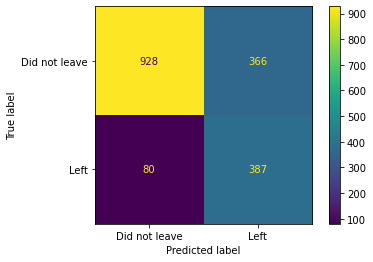

In [85]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not leave','Left'])

In [86]:
399/(399+68)

0.854389721627409

**85%** recall
The company can focus on the people who are leaving. As acquiring a new clients often cost more than retaining existing ones, maximixing the recall of prediction is important.


Once we can identify those customers that are at risk of cancelling. Exact marketing action can be decided for each induvidal customer to maximise that the customer will remain.

For telco dataset, each customer is having some preferences, they can cancle the subscription for various reasons. Those customers can be retained by giving some kind of offer , like free data , like vodafone operator done. Or coupon code in there application everytime they recharge. Mean time running a survey
to get the feedback of these customers and knowing the type of problems they face or the expectations they are having. 
* **Offering Insentive**
* **Building Retention strategies**
* **Predicting Churn is a fact of life for any subscription business**
* **Churn meaning is to leave**
* **Offering the insentive to the customer who are not going to leave
is actually loss of revenue**
* **Churn prediction model should rely on real time data to quantify the risk of churning**

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric = 'aucpr',
                            early_stopping_rounds=10,
                            gamma = 0.25,
                            learning_rate = 0.1,
                            max_depth = 4,
                            reg_lambda=9,
                            scale_pos_weight=3.1,
                            subsample=0.9,
                            colsample_bytree=0.5,
                           seed=42,
                           n_estimators=1)
clf_xgb.fit(X_train,)